In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy import stats
from skimage.metrics import structural_similarity as ssim
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Links info:
> [Hough Transformm with OpenCV](https://learnopencv.com/hough-transform-with-opencv-c-python/)

> [Hough Circle Transform](https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html)

> [Miscellaneous Image Transformations
](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html)

### Elementos Estruturais

kernel_1: Todos os uns - às vezes chamado de "kernel de preenchimento" ou "kernel de saturação", pois todos os pixels em sua vizinhança são ativados.

kernel_2: Cruz - devido à sua forma que se assemelha a uma cruz.

kernel_3: Cruz diagonal - semelhante ao kernel da cruz, mas os uns estão na diagonal.

kernel_4: Linha vertical - devido aos uns formarem uma linha vertical no centro.

kernel_5: Cruz central - porque possui uma cruz central de uns.

kernel_6: Quadrado com ponto central - devido à sua forma de quadrado com um ponto central.

kernel_7: Quadrado central - porque possui um quadrado de uns no centro.

kernel_8: Quadrado completo - todos os elementos são ativados, formando um quadrado completo.

kernel_9: Quadrado pequeno - porque possui um quadrado menor de uns no centro.

kernel_10: X - devido à sua forma que se assemelha a uma letra X.


**detalhes:**
> kernel_1: Um kernel de 3x3 onde todos os elementos são 1.

>kernel_2: Um kernel de 3x3 com 1 no centro e zeros em volta.

>kernel_3: Um kernel de 3x3 com 1 na diagonal e zeros nos outros locais.

>kernel_4: Um kernel de 3x3 com 1 na vertical central e zeros ao redor.

>kernel_5: Um kernel de 5x5 onde o 1 forma uma cruz central.

>kernel_6: Um kernel de 5x5 onde o 1 forma um quadrado com um ponto no centro.

>kernel_7: Um kernel de 7x7 onde o 1 forma um quadrado central.

>kernel_8: Um kernel de 7x7 onde todos os elementos são 1.

>kernel_9: Um kernel de 5x5 onde o 1 forma um pequeno quadrado central.

>kernel_10: Um kernel de 5x5 onde o 1 forma um X.



In [ ]:
kernel_1 = np.uint8([[1,1,1],[1,1,1],[1,1,1]])
print('Elementro estruturante 1: ', kernel_1)

print('\n\n')

kernel_2 = np.uint8([[0,1,0],[1,1,1],[0,1,0]])
print('Elementro estruturante 2: ', kernel_2)

print('\n\n')

kernel_3 = np.uint8([[1,0,1],[0,1,0],[1,0,1]])
print('Elementro estruturante 3: ', kernel_3)

print('\n\n')

kernel_4 = np.uint8([[0,1,0],[0,1,0],[1,1,1],[0,1,0],[0,1,0]])
print('Elementro estruturante 4: ', kernel_4)

print('\n\n')

kernel_5 = np.uint8([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]])
print('Elementro estruturante 5: ', kernel_5)

print('\n\n')

kernel_6 = np.uint8([[1,0,0,0,1],[0,1,0,1,0],[0,1,1,1,0],[0,1,0,1,0],[1,0,0,0,1]])
print('Elementro estruturante 6: ', kernel_6)

print('\n\n')

kernel_7 = np.uint8([[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[1,1,1,1,1,1,1],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]])
print('Elementro estruturante 7: ', kernel_7)

print('\n\n')

kernel_8 = np.uint8([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])
print('Elementro estruturante 8: ', kernel_8)

print('\n\n')

kernel_9 = np.uint8([[0,0,0,0,0],[0,0,1,0,0],[0,1,1,1,0],[0,0,1,0,0],[0,0,0,0,0]])
print('Elementro estruturante 9: ', kernel_9)

print('\n\n')

kernel_10 = np.uint8([[0,0,0,0,0],[1,0,0,0,1],[1,1,0,1,1],[1,0,0,0,1],[0,0,0,0,0]])
print('Elementro estruturante 10: ', kernel_10)

print('\n\n')

kernel_elipse = np.array([
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

print('Elementro estruturante elipse: ', kernel_elipse)

Elementro estruturante 1:  [[1 1 1]
 [1 1 1]
 [1 1 1]]



Elementro estruturante 2:  [[0 1 0]
 [1 1 1]
 [0 1 0]]



Elementro estruturante 3:  [[1 0 1]
 [0 1 0]
 [1 0 1]]



Elementro estruturante 4:  [[0 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 0]
 [0 1 0]]



Elementro estruturante 5:  [[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]



Elementro estruturante 6:  [[1 0 0 0 1]
 [0 1 0 1 0]
 [0 1 1 1 0]
 [0 1 0 1 0]
 [1 0 0 0 1]]



Elementro estruturante 7:  [[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]



Elementro estruturante 8:  [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]



Elementro estruturante 9:  [[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]



Elementro estruturante 10:  [[0 0 0 0 0]
 [1 0 0 0 1]
 [1 1 0 1 1]
 [1 0 0 0 1]
 [0 0 0 0 0]]



Elementro estruturante elipse:  [[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0

# Imagem 1

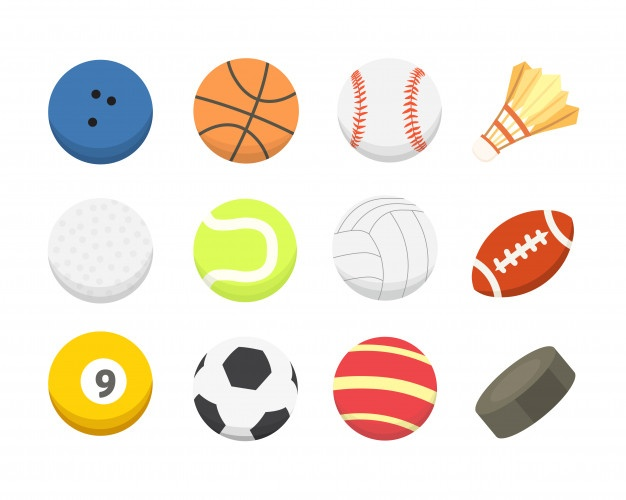

In [ ]:
img2 = "/content/drive/MyDrive/PIM/ATVD07/conjunto-de-bola-colorida-dos-desenhos-animados-bolas-de-esporte-s-isolado_263016-1.jpg"
imag2 = cv2.imread(img2)

cv2_imshow(imag2)

imagGrey2 = cv2.cvtColor(imag2, cv2.COLOR_BGR2GRAY)

### Informações

In [ ]:
def Inf_spatial(img_grayscale):
    sh = cv2.Sobel (img_grayscale, cv2.CV_64F , 1, 0, ksize =1)
    sv = cv2.Sobel (img_grayscale , cv2.CV_64F , 0, 1, ksize =1)

    #SIr = np.sqrt (sh **2 + sv **2)
    SIr = np.sqrt(np.square(sh) + np.square(sv))

    SI_mean = np.sum(SIr ) / (SIr. shape [0] * SIr . shape [1])
    SI_rms = np.sqrt (np.sum (SIr **2) / (SIr. shape [0] * SIr . shape [1]) )
    SI_stdev = np.sqrt (np.sum(SIr **2 - SI_mean **2) / (SIr. shape [0] *SIr. shape [1]) )

    return SI_stdev

SI = Inf_spatial(imagGrey2)


print ("Informação espacial 1 : %f" % SI )

Informação espacial 1 : 22.173329


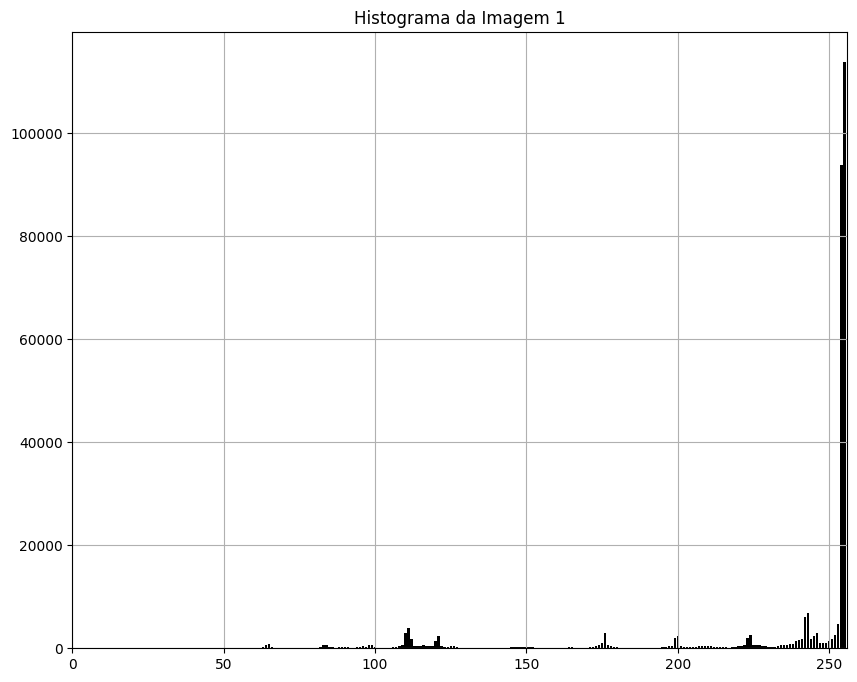

In [ ]:
def histograma(imagem):
    histogram, _ = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return histogram

hist_1 = histograma(imagGrey2)
plt.figure(figsize=(10, 8))
plt.title("Histograma da Imagem 1")
plt.bar(np.arange(256), hist_1, color='black')
plt.xlim([0, 256])
plt.grid(True)

### Pré processamento

Imagem 2 binarizada


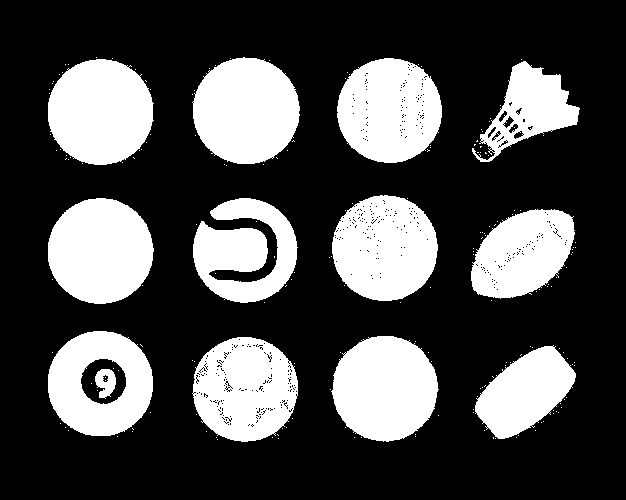



Imagem depois do algoritmo floodfill aplicado


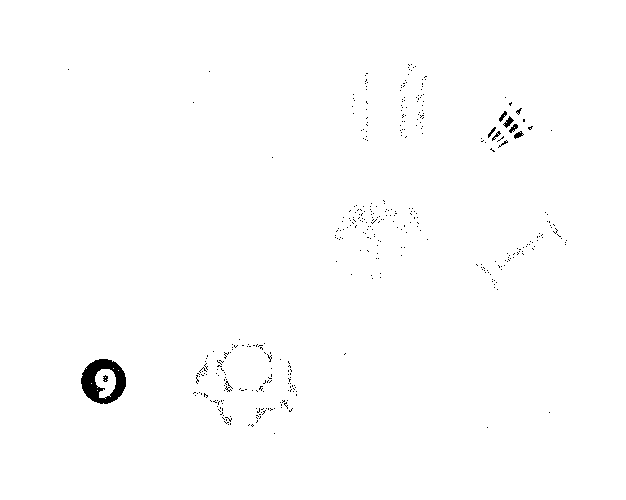



Imagem depois do algoritmo floodfill invertido aplicado


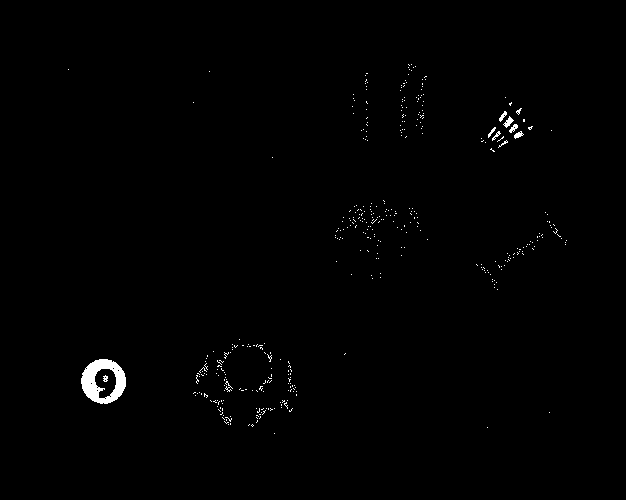



Imagem binarizada + imagem com o floodfill invertido 


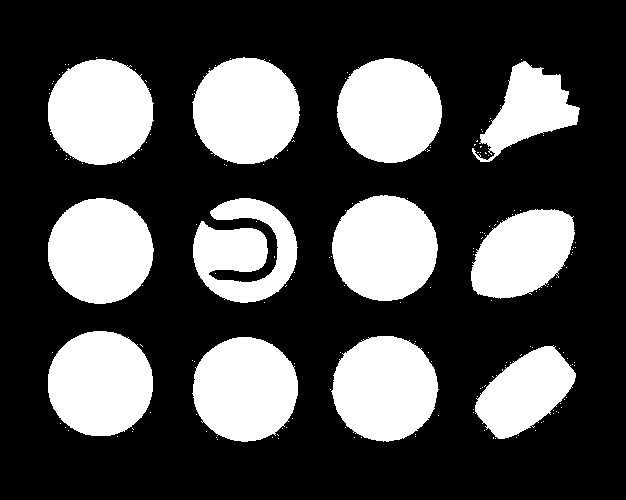

In [ ]:
th, imag_binarized_2 = cv2.threshold(imagGrey2, 247, 255, cv2.THRESH_BINARY_INV);

im_floodfill_2 = imag_binarized_2.copy()
h_2, w_2 = imag_binarized_2.shape[:2]
mask_2 = np.zeros((h_2+2, w_2+2), np.uint8)
cv2.floodFill(im_floodfill_2, mask_2, (0,0), 255);
im_floodfill_inv_2 = cv2.bitwise_not(im_floodfill_2)
img_out2 = imag_binarized_2|im_floodfill_inv_2

print('Imagem 2 binarizada')
cv2_imshow(imag_binarized_2)
print('\n')
print('Imagem depois do algoritmo floodfill aplicado')
cv2_imshow(im_floodfill_2)
print('\n')
print('Imagem depois do algoritmo floodfill invertido aplicado')
cv2_imshow(im_floodfill_inv_2)
print('\n')
print('Imagem binarizada + imagem com o floodfill invertido ')
cv2_imshow(img_out2)

Máscara dilatada


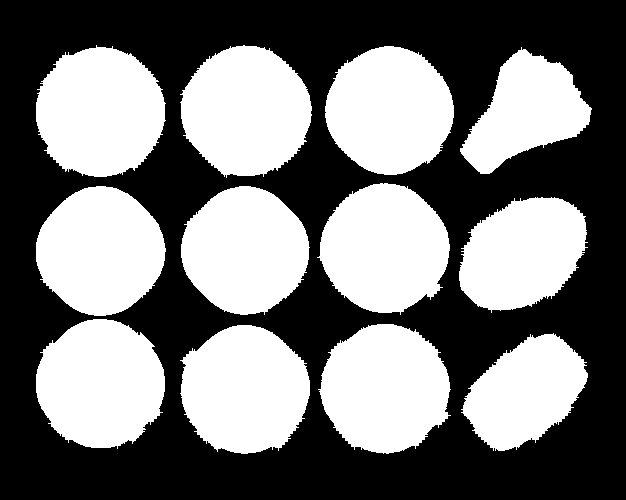

Máscara dilatada e erodida


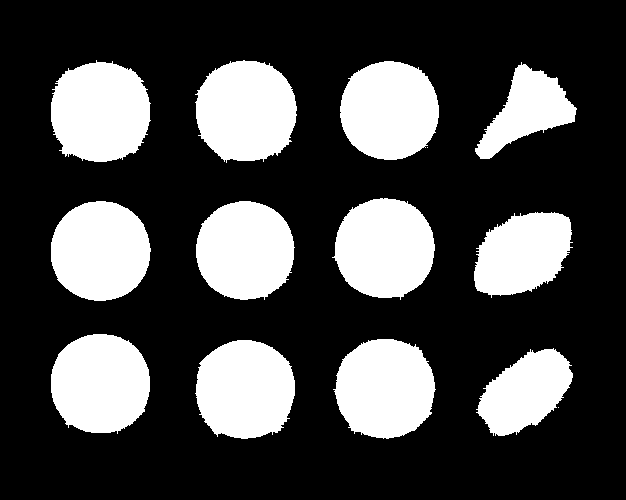

Imagem das bolas isoladas


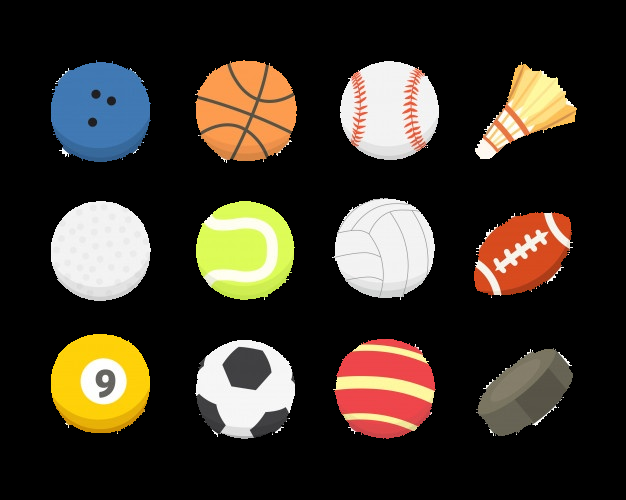

In [ ]:
Imag_dilated_1 = cv2.dilate(img_out2, kernel_7, iterations=4)
print('Máscara dilatada')
cv2_imshow(Imag_dilated_1)

Imag_eroded_1 = cv2.erode(Imag_dilated_1, kernel_7, iterations=5)

print('Máscara dilatada e erodida')
cv2_imshow(Imag_eroded_1 )

Mask_final =  Imag_eroded_1
Imag_Final = cv2.bitwise_and(imag2, imag2, mask = Mask_final)

print('Imagem das bolas isoladas')
cv2_imshow(Imag_Final)

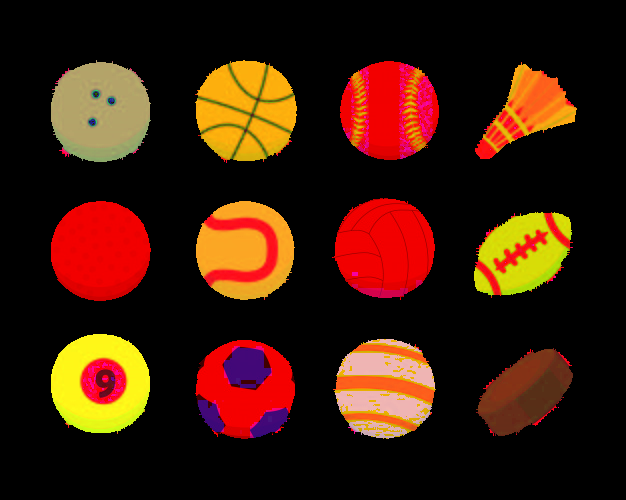

In [ ]:
bolas2 = cv2.cvtColor(Imag_Final, cv2.COLOR_BGR2HSV)
cv2_imshow(bolas2)

### Funções

In [ ]:
def fix_white_stuff(**kwargs):
    kernel_dil = kwargs["kernel_dil"]
    kernel_ero = kwargs["kernel_ero"]
    img = kwargs["img"]
    img_ori = kwargs["img_ori"]
    eroded = cv2.erode(img,kernel_ero,iterations=3)

    dilated = cv2.dilate(eroded, kernel_dil, iterations=5)

    mask = cv2.cvtColor(dilated, cv2.COLOR_BGR2GRAY)
    res = cv2.bitwise_and(img_ori,img_ori, mask = mask )

    cv2_imshow(mask)
    return res;

In [ ]:
def image_mask(low, up, imagex):

  imagex_hsv = img_hsv_org

  lower = np.array(low,np.uint8)
  upper = np.array(up,np.uint8)

  color_x = cv2.inRange(imagex_hsv,lower,upper)
  img_conv = cv2.bitwise_and(imagex,imagex,mask = color_x)

  return img_conv

In [ ]:
def resolve_mask_dilated(**kwargs):
    img_hsv = kwargs["img_hsv"]
    upper_array = kwargs["upper_array"]
    lower_array = kwargs["lower_array"]
    img_ori = kwargs["img_ori"]
    name = kwargs["name"]
    kernel = kwargs["kernel"]

    try:
        mask = kwargs["mask"]
    except:
        mask = cv2.inRange(img_hsv, lower_array, upper_array)
    try:
        flag = kwargs["flag"]
    except:
        flag = 0
    mask_dil = cv2.dilate(mask, kernel, iterations=3)
    if flag == 1:
        mask_dil = erode_dilate_mask(mask = mask_dil)
    res = cv2.bitwise_and(img_ori,img_ori, mask = mask_dil)
    img_comparison = np.hstack((img_ori,res))

    cv2_imshow(img_comparison)
    cv2_imshow(mask_dil)



In [ ]:
_, img_binarizada1 = cv2.threshold(imagGrey2, 247, 255, cv2.THRESH_BINARY_INV)

copia_bin1 = img_binarizada1.copy()

heigth, width = copia_bin1.shape[:2]
mask = np.zeros ((heigth+2, width+2), np.uint8)

cv2.floodFill(copia_bin1,mask, (0,0),255);

mask_inv=cv2.bitwise_not(copia_bin1)

im_out = img_binarizada1|mask_inv

img_dil = cv2.dilate(im_out, kernel_7, iterations=4)

img_ero = cv2.erode(img_dil, kernel_7, iterations=5)

img_out = cv2.bitwise_and(imag2 , imag2 , mask = img_ero.copy())

img_hsv = cv2.cvtColor(img_out, cv2.COLOR_BGR2HSV)
img_hsv_org = img_hsv.copy()


### Bola de Tênis

Original


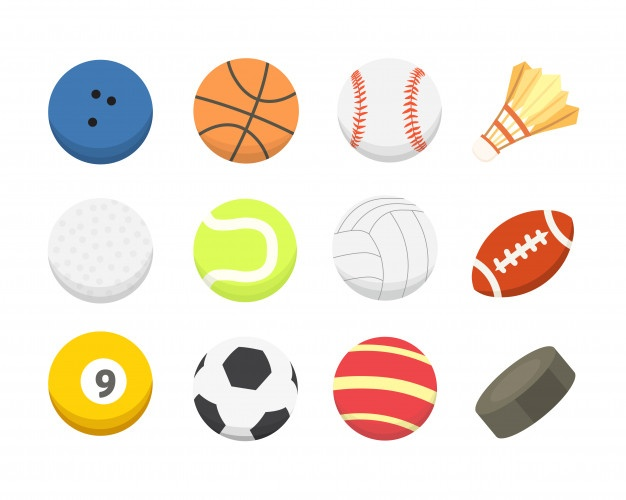

Máscara


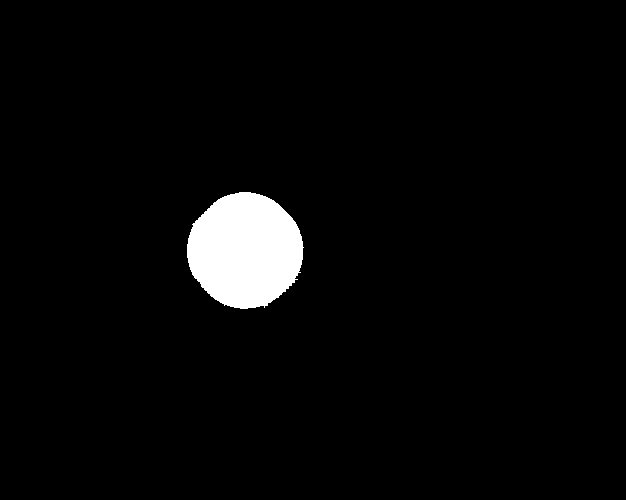

Bolas de Tênis


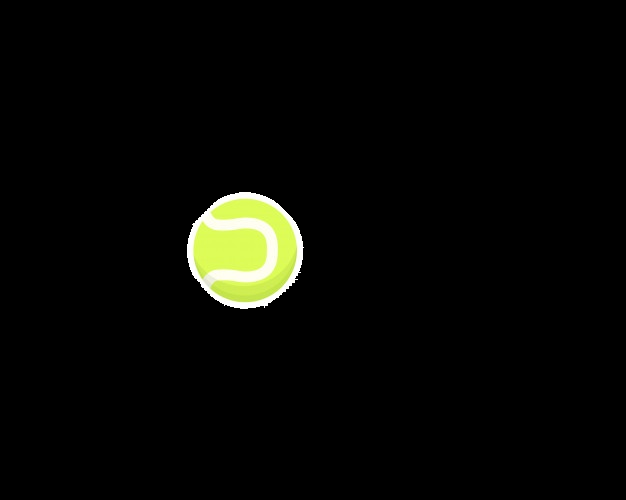

In [ ]:
lower_verde = np.array([35,30,100])
upper_verde = np.array([70,200,255])

mask_tenis = cv2.inRange(bolas2, lower_verde, upper_verde)
mask_tenis_dilated = cv2.dilate(mask_tenis, kernel_7, iterations=3)
res_tenis = cv2.bitwise_and(imag2,imag2, mask = mask_tenis_dilated)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_tenis_dilated)
print("Bolas de Tênis")
cv2_imshow(res_tenis)

### Bola de basquete

Original


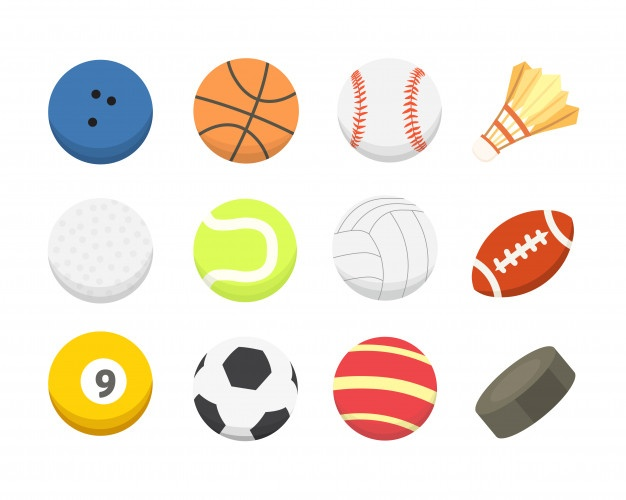

Máscara


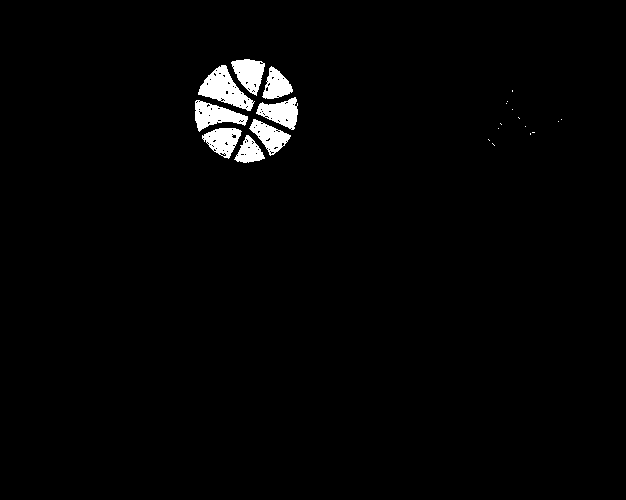

Bola de basquete


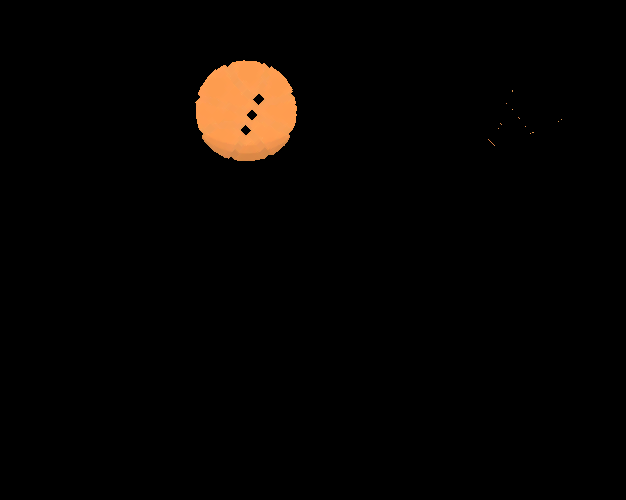

Máscara


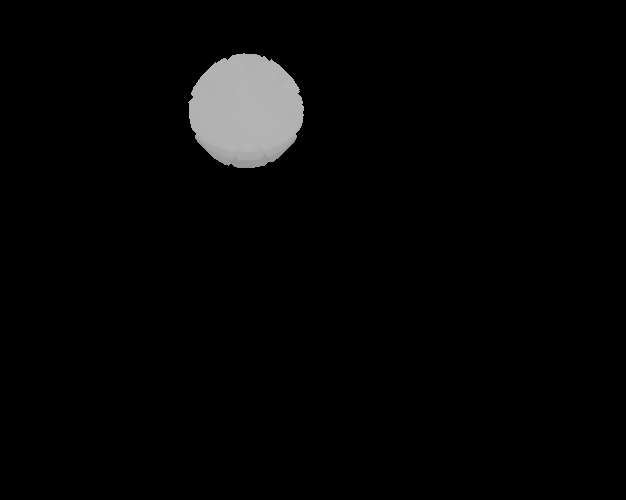

Resultado


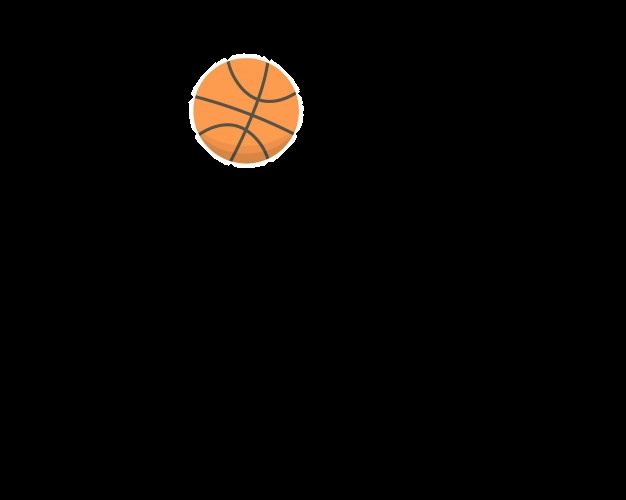

In [ ]:
img_hsv = cv2.cvtColor(imag2, cv2.COLOR_BGR2HSV)

lower_bound = np.array([12,160,170])  # Valor mínimo de H, S e V
upper_bound = np.array([15,180,255])  # Valor máximo de H, S e V

mask_orange = cv2.inRange(img_hsv, lower_bound, upper_bound)
print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_orange)

img_aux_basquete = image_mask(lower_bound, upper_bound, imag2)
img_morfologia = cv2.morphologyEx(img_aux_basquete, cv2.MORPH_CLOSE, kernel_2, iterations=4) # Operações de abertura (erossão seguida de dilatação)

print("Bola de basquete")
cv2_imshow(img_morfologia)

print("Máscara")
res_basq = fix_white_stuff(kernel_ero = kernel_9,kernel_dil = kernel_5,img = img_morfologia,img_ori = imag2)

print("Resultado")
cv2_imshow(res_basq)

Outra forma (sem função direta)

Original


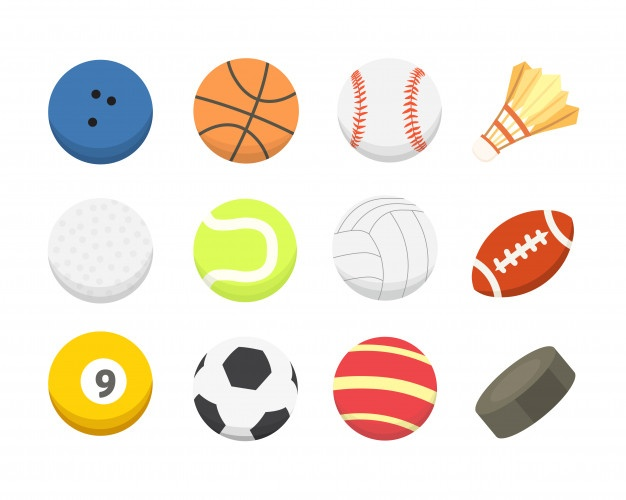

Máscara 1


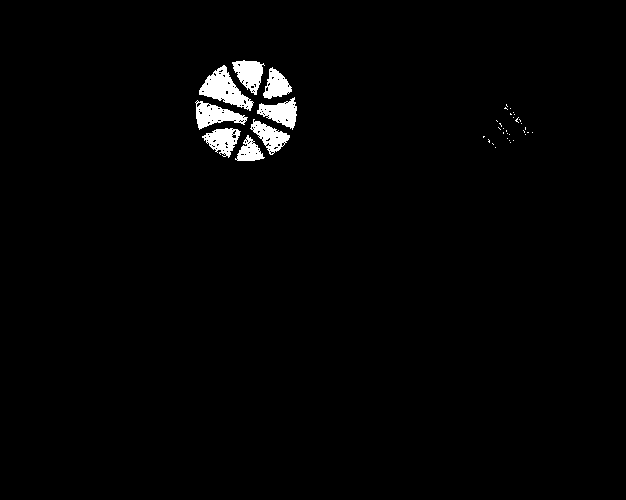

Bola de basquete


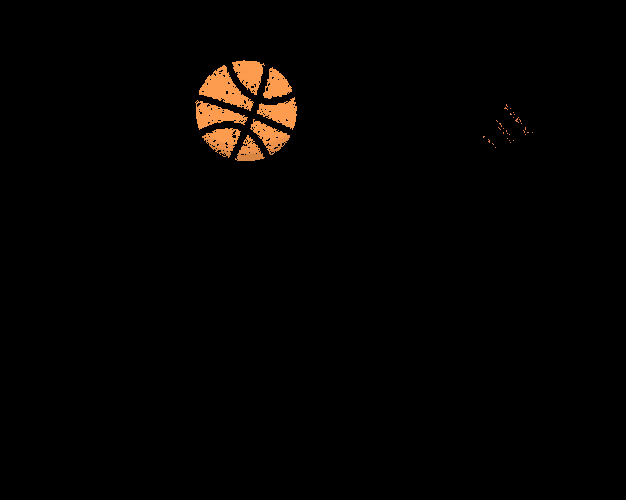

Erodida e dilatada


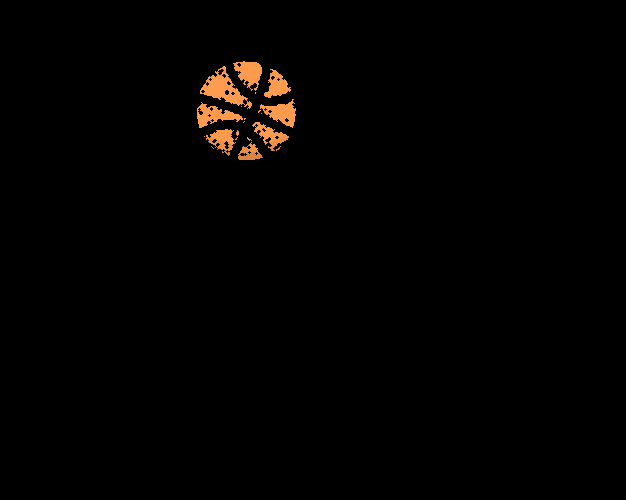

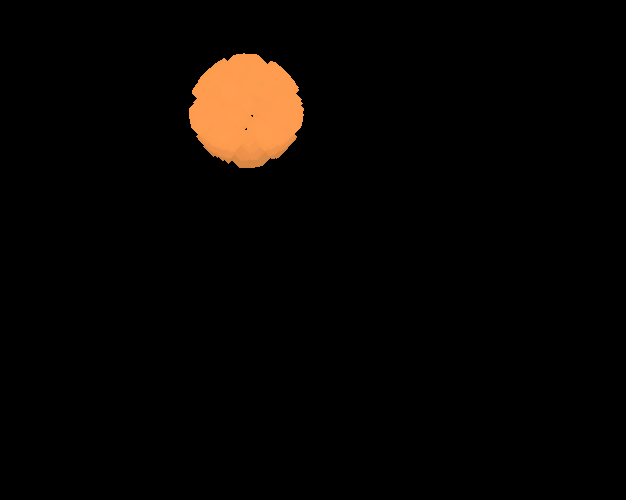

Máscara 2


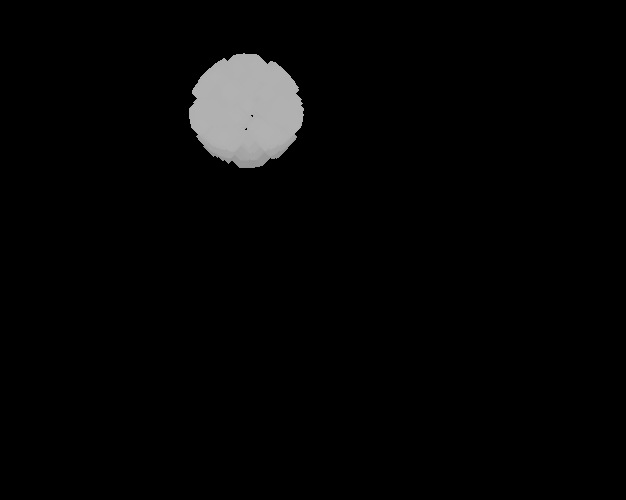

Bola de basquete FINAL


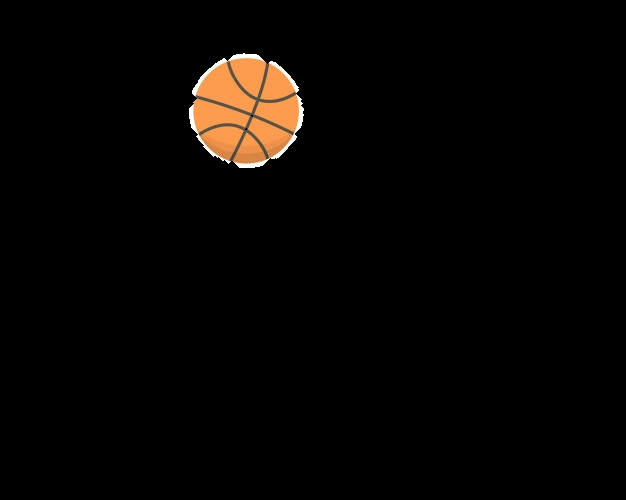

In [ ]:
lower_laranja_basquete = np.array([10,170,180])
upper_laranja_basquete = np.array([15,180,255])

mask_basquete = cv2.inRange(bolas2, lower_laranja_basquete, upper_laranja_basquete)

res_basquete = cv2.bitwise_and(imag2,imag2, mask = mask_basquete)

res_basquete_eroded = cv2.erode(res_basquete, kernel_2, iterations=1)

res_basquete_dilated = cv2.dilate(res_basquete_eroded, kernel_2, iterations=8)

mask_basquete_2 = cv2.cvtColor(res_basquete_dilated, cv2.COLOR_BGR2GRAY)

res_basquete_2 = cv2.bitwise_and(imag2,imag2, mask = mask_basquete_2 )


print("Original")
cv2_imshow( imag2)
print("Máscara 1")
cv2_imshow(mask_basquete)
print("Bola de basquete")
cv2_imshow(res_basquete)
print("Erodida e dilatada")
cv2_imshow(res_basquete_eroded)
cv2_imshow(res_basquete_dilated)
print("Máscara 2")
cv2_imshow(mask_basquete_2)
print("Bola de basquete FINAL")
cv2_imshow(res_basquete_2)

### Bola de Sinuca

Original


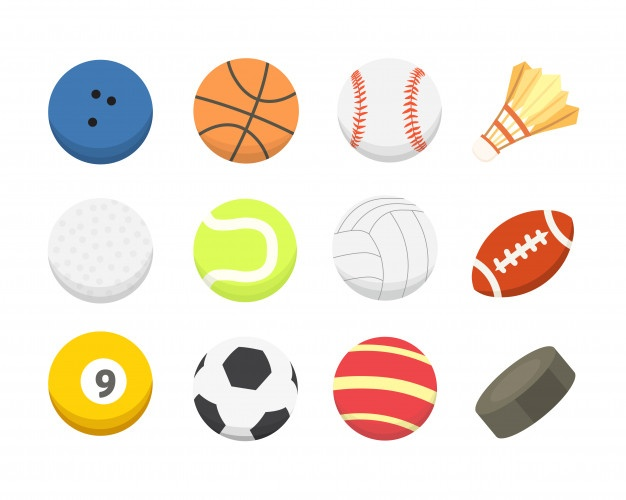

Máscara


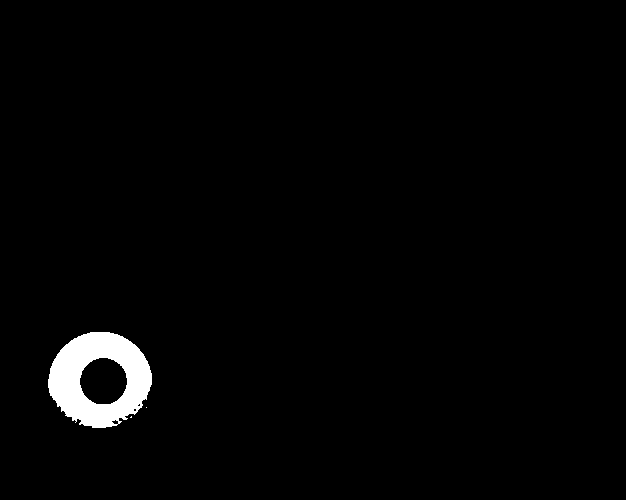

Máscara dilatada


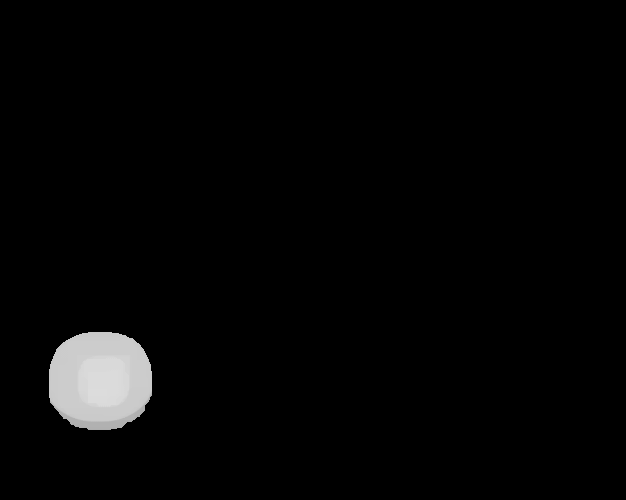

Bola de sinuca


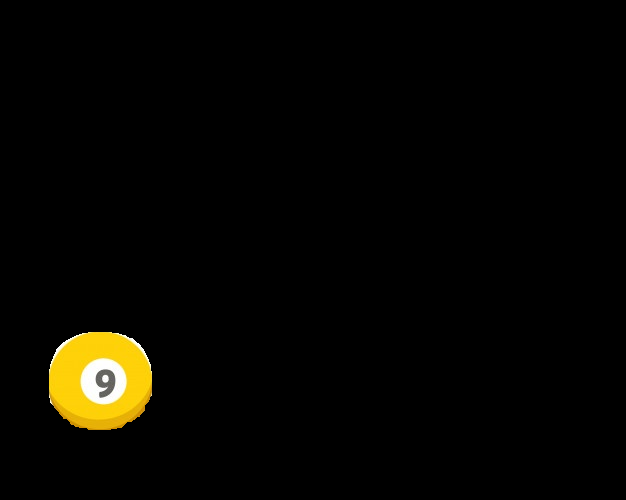

In [ ]:
img_hsv = cv2.cvtColor(imag2, cv2.COLOR_BGR2HSV)

lower_bound = np.array([23,150,5])  # Valor mínimo de H, S e V
upper_bound = np.array([32,255,255])  # Valor máximo de H, S e V

mask_orange = cv2.inRange(img_hsv, lower_bound, upper_bound)
print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_orange)
target = imag2
img_aux_basquete = image_mask(lower_bound, upper_bound, target)
img_morfologia = cv2.morphologyEx(img_aux_basquete, cv2.MORPH_CLOSE, kernel_8, iterations=9) # Operações de abertura (erossão seguida de dilatação)

print("Máscara dilatada")
res_sinuca = fix_white_stuff(kernel_ero = kernel_2,kernel_dil = kernel_3,img = img_morfologia,img_ori = imag2)

print("Bola de sinuca")
cv2_imshow(res_sinuca)

Outra forma (sem função direta)

In [ ]:
lower_bilhar_yellow = np.array([25,150,5])
upper_bilhar_yellow = np.array([33,255,255])

lower_bilhar_orage = np.array([12,200,0])
upper_bilhar_orage = np.array([30,255,255])

lower_bilhar_grey = np.array([15,5,80])
upper_bilhar_grey = np.array([33,20,200])

mask_bilhar_yellow = cv2.inRange(bolas2, lower_bilhar_yellow, upper_bilhar_yellow)

mask_bilhar_orage = cv2.inRange(bolas2, lower_bilhar_orage, upper_bilhar_orage)

mask_bilhar_grey = cv2.inRange(bolas2, lower_bilhar_grey, upper_bilhar_grey)

mask_bilhar = cv2.bitwise_or(mask_bilhar_orage, mask_bilhar_yellow)

mask_bilhar = cv2.bitwise_or(mask_bilhar, mask_bilhar_grey)

mask_bilhar_eroded = cv2.erode(mask_bilhar, kernel_2, iterations=2)

mask_bilhar_dilated = cv2.dilate(mask_bilhar_eroded, kernel_7, iterations=5)

res_bilhar = cv2.bitwise_and(imag2,imag2, mask = mask_bilhar_dilated)

Original


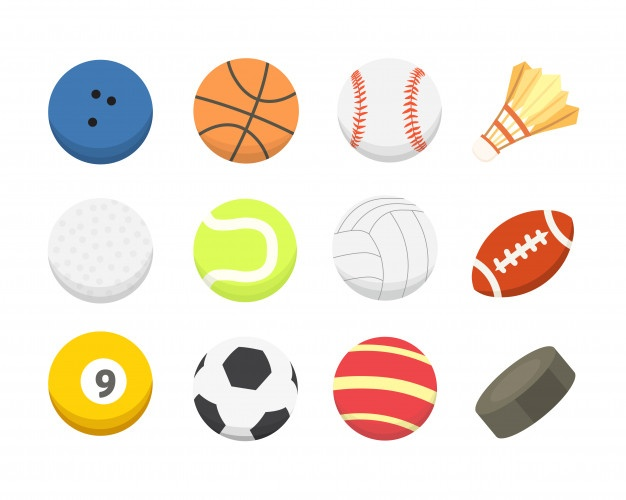

Máscara


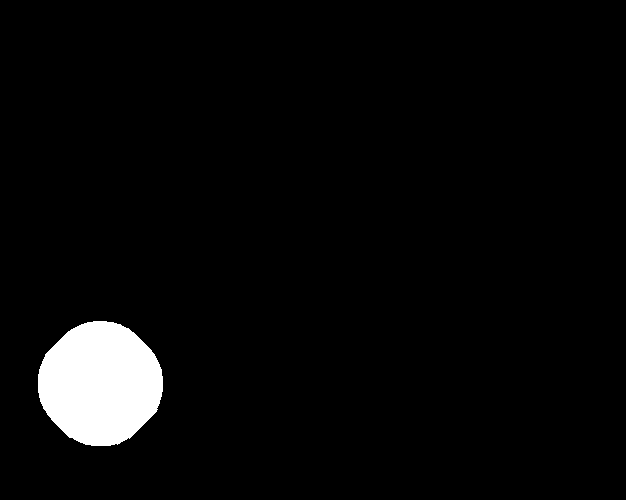

Bolas de baseball


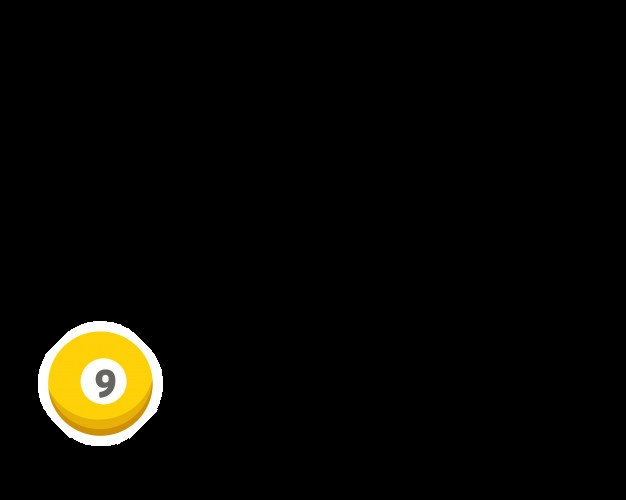

In [ ]:
print("Original")
cv2_imshow(imag2)
print("Máscara")
cv2_imshow(mask_bilhar_dilated)
print("Bolas de baseball")
cv2_imshow(res_bilhar)

### Bola de Futebol americano

Original


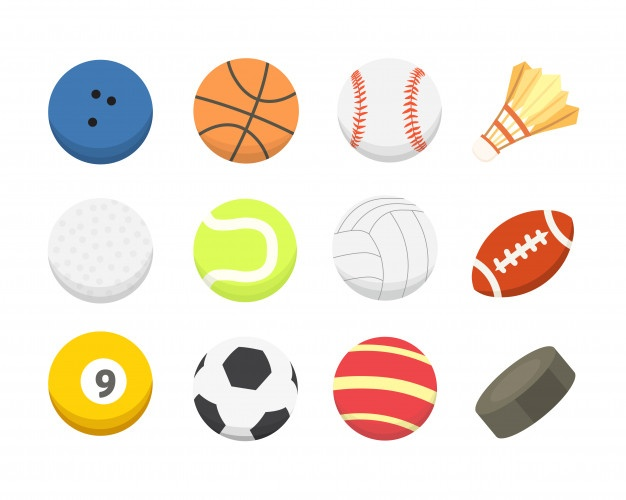

Máscara


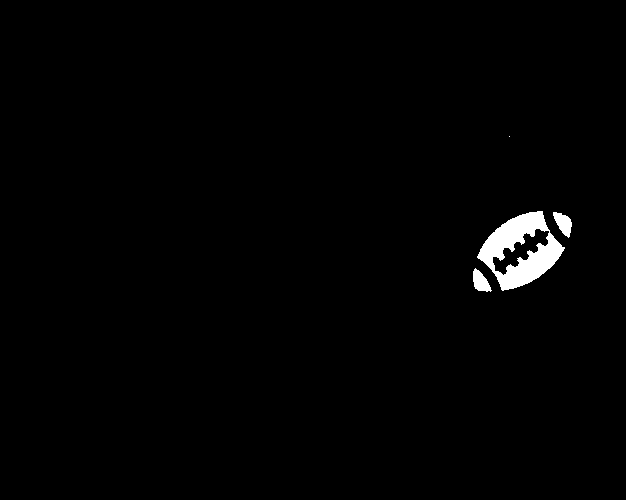

Bola de futebol americano


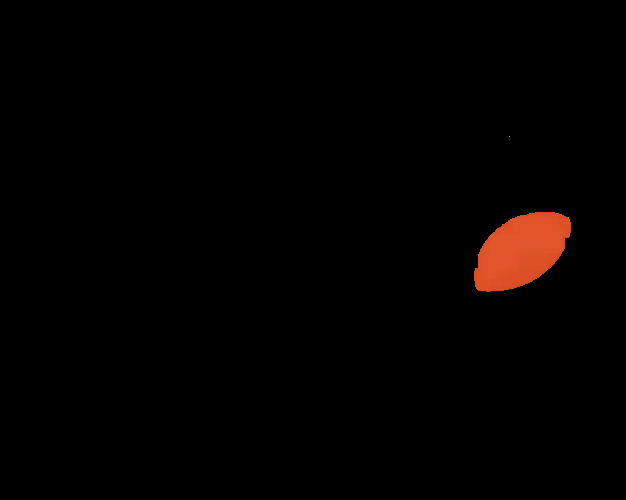

Máscara modificada


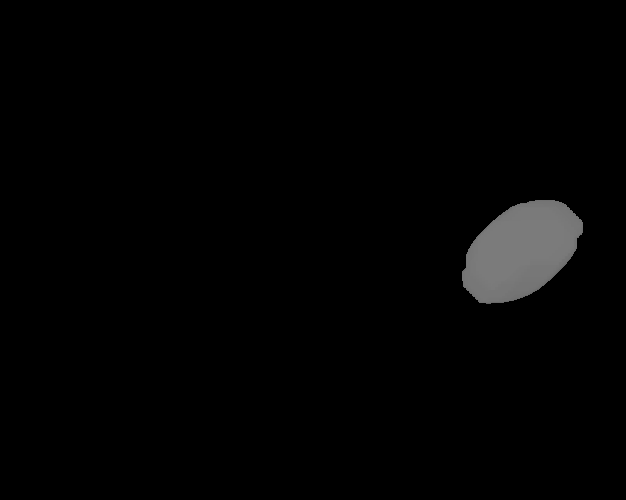

Resultado


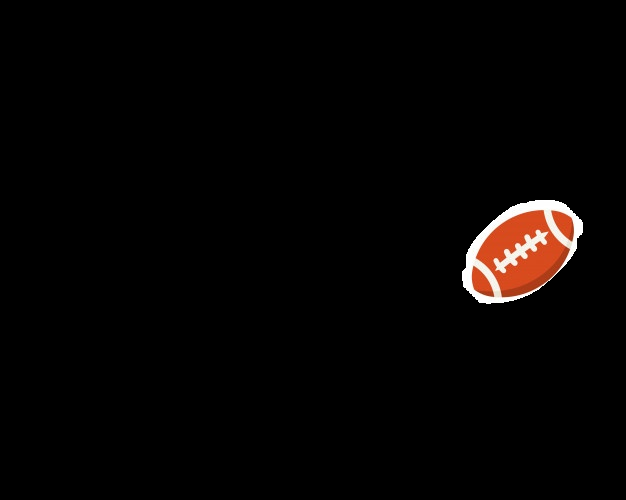

In [ ]:
img_hsv = cv2.cvtColor(imag2, cv2.COLOR_BGR2HSV)

lower_fut = np.array([4,200,190]) # Valor mínimo de H, S e V
upper_fut = np.array([15,255,255])  # Valor máximo de H, S e V

mask_fut = cv2.inRange(img_hsv, lower_fut, upper_fut)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_fut)

img_aux_fut = image_mask(lower_fut, upper_fut, imag2)
img_morfologia = cv2.morphologyEx(img_aux_fut, cv2.MORPH_CLOSE, kernel_8, iterations=12)

print("Bola de futebol americano")
cv2_imshow(img_morfologia)

print("Máscara modificada")
res_fut = fix_white_stuff(kernel_ero = kernel_2,kernel_dil = kernel_7,img = img_morfologia,img_ori = imag2)

print("Resultado")
cv2_imshow(res_fut)

Outra forma (sem função direta)

Original


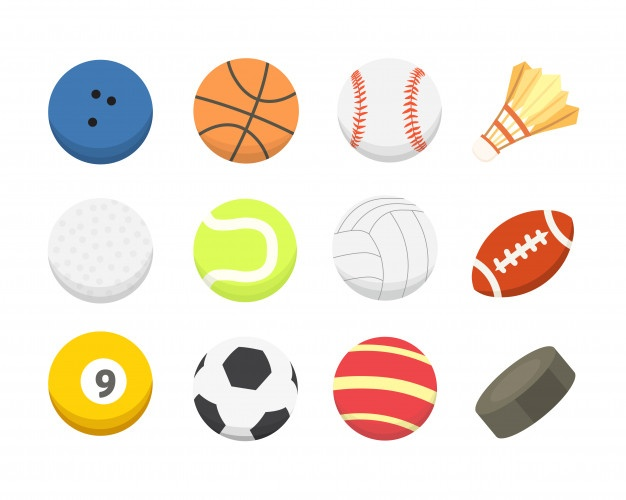

Máscara


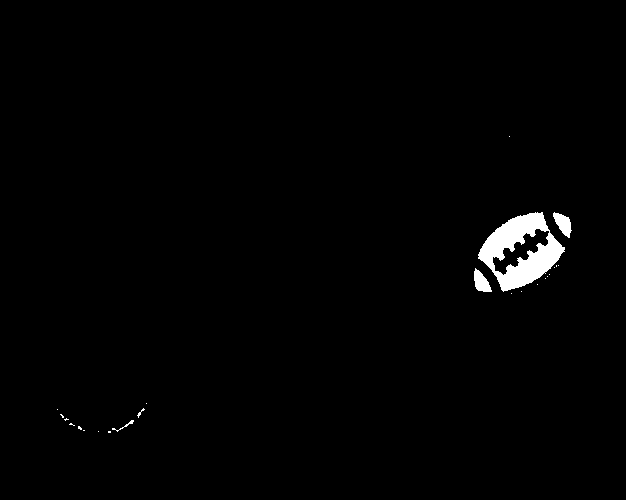

Bolas de futebol americano


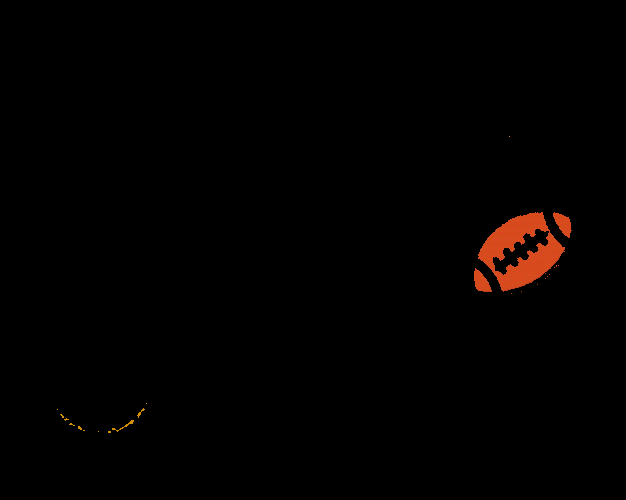

Bola de Futebol americano erodida e dilatada


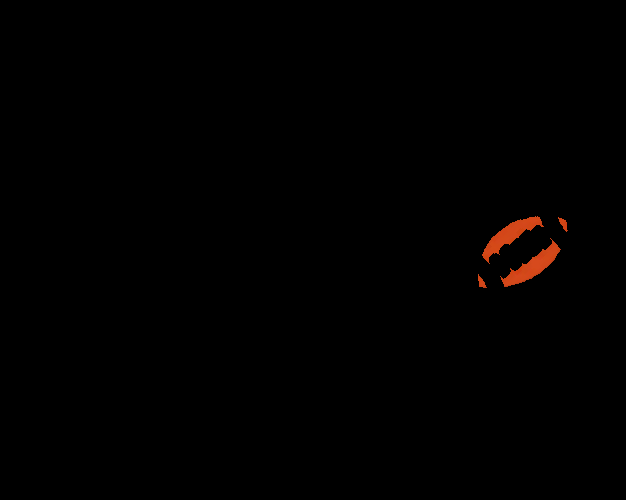

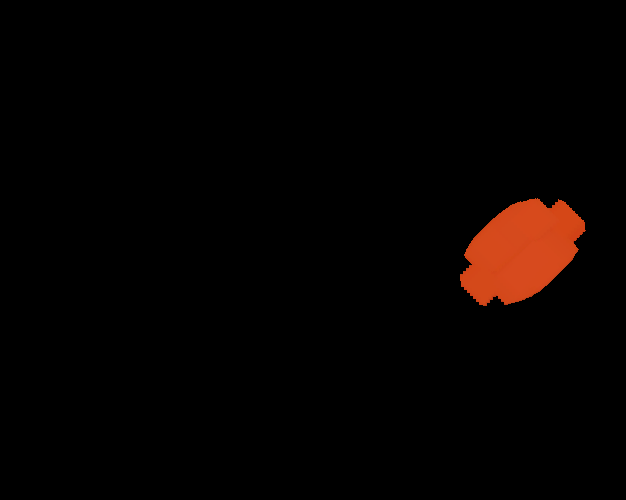

Bola de Futebol americano FINAL


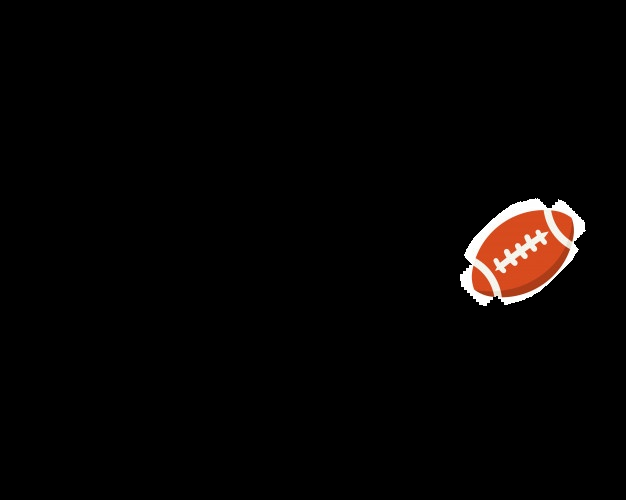

In [ ]:
lower_laranja_fut = np.array([5,200,180])
upper_laranja_fut  = np.array([20,255,255])

mask_futamerican  = cv2.inRange(bolas2, lower_laranja_fut , upper_laranja_fut )

res_futamerican  = cv2.bitwise_and(imag2,imag2, mask = mask_futamerican )

print("Original")
cv2_imshow(imag2)
print("Máscara")
cv2_imshow(mask_futamerican)
print("Bolas de futebol americano")
cv2_imshow(res_futamerican)

res_NFL_eroded = cv2.erode(res_futamerican , kernel_2, iterations=4)

res_NFL_dilated = cv2.dilate(res_NFL_eroded, kernel_7, iterations=6)

mask_NFL_2 = cv2.cvtColor(res_NFL_dilated, cv2.COLOR_BGR2GRAY)

print('Bola de Futebol americano erodida e dilatada')
cv2_imshow(res_NFL_eroded)
cv2_imshow(res_NFL_dilated)

print('Bola de Futebol americano FINAL')
res_futamerican2 = cv2.bitwise_and(imag2,imag2, mask = mask_NFL_2 )
cv2_imshow(res_futamerican2)


### Bola de Boliche

Original


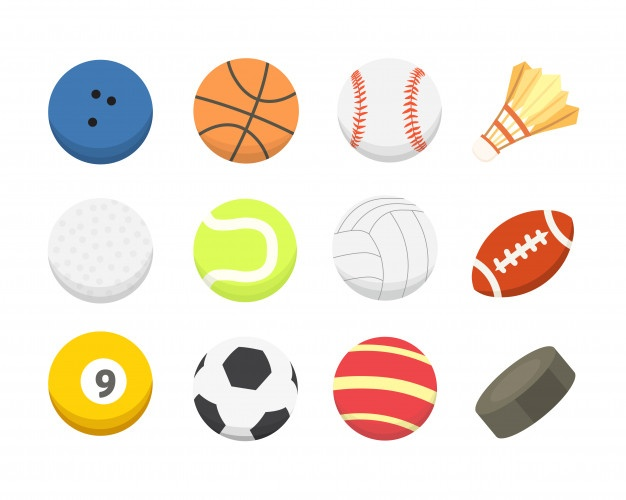

Máscara


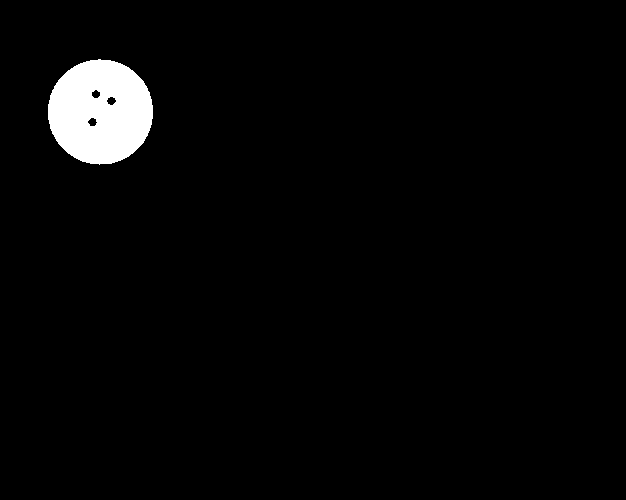

Bolas de boliche


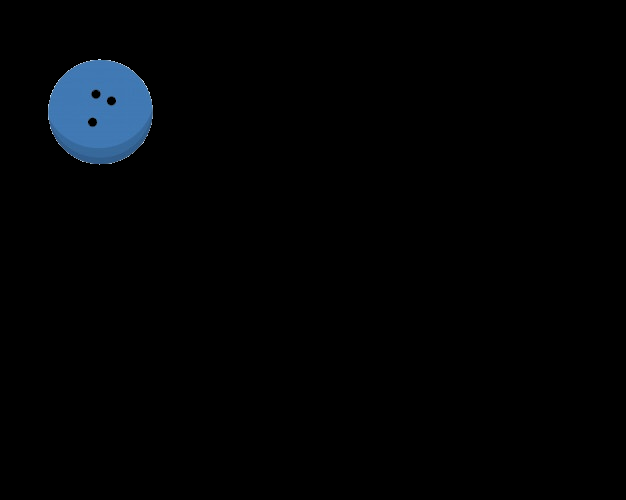

In [ ]:
img_hsv = cv2.cvtColor(imag2, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 45, 60])  # Valor mínimo de H, S e V
upper_blue = np.array([115, 255, 255])  # Valor máximo de H, S e V

mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue) # máscara p/ cor Azul

res_boliche = cv2.bitwise_and(imag2, imag2, mask=mask_blue)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_blue)
print("Bolas de boliche")
cv2_imshow(res_boliche)

### Bola de Futebol

Original


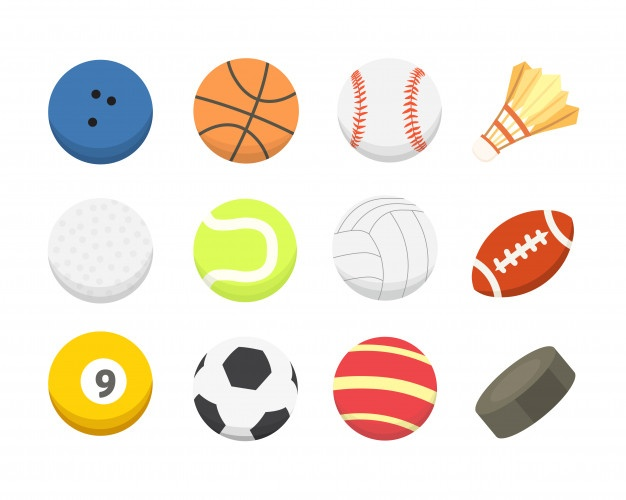

Máscara


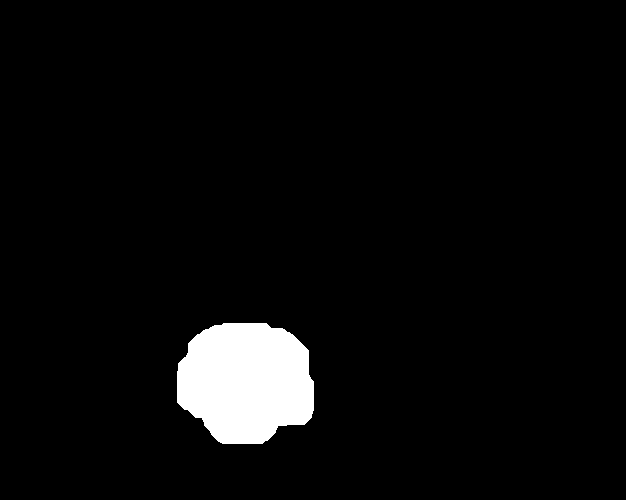

Bolas de boliche


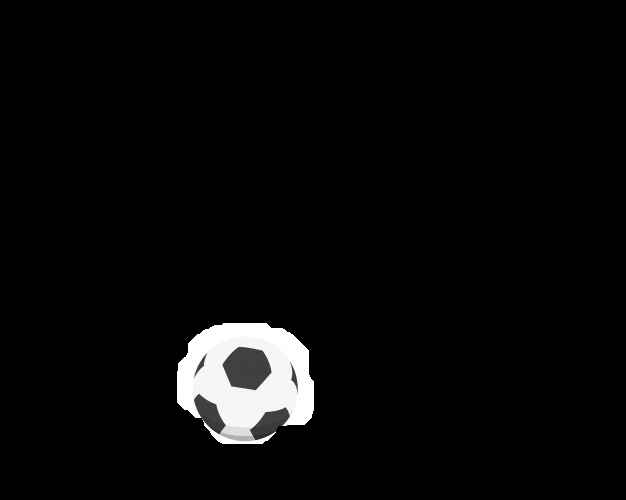

In [ ]:
lower_preto = np.array([0,0,245])
upper_preto = np.array([0,0,255])

mask_futebol = cv2.inRange(bolas2, lower_preto, upper_preto)
mask_futebol_eroded = cv2.erode(mask_futebol , kernel_2, iterations=2)
mask_futebol_dilated = cv2.dilate(mask_futebol_eroded , kernel_5, iterations=4)
mask_futebol_dilated = cv2.dilate(mask_futebol_dilated , kernel_8, iterations=5)
mask_futebol_eroded22 = cv2.erode(mask_futebol_dilated , kernel_4, iterations=2)

res_futebol  = cv2.bitwise_and(imag2,imag2, mask = mask_futebol_eroded22)

print("Original")
cv2_imshow(imag2)
print("Máscara")
cv2_imshow(mask_futebol_eroded22)
print("Bolas de boliche")
cv2_imshow(res_futebol)

### Peteca

Original


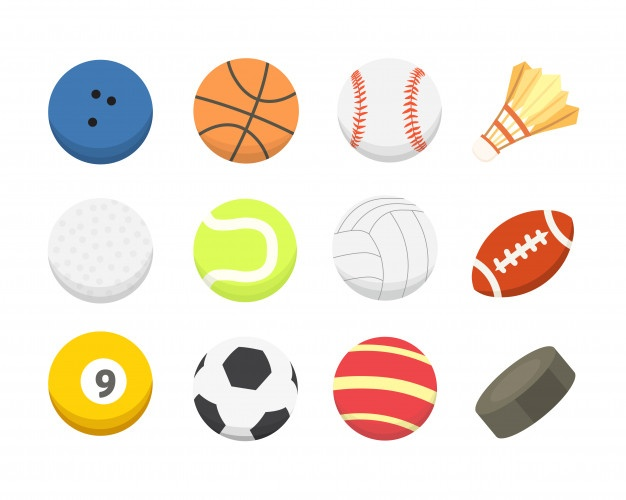

Máscara


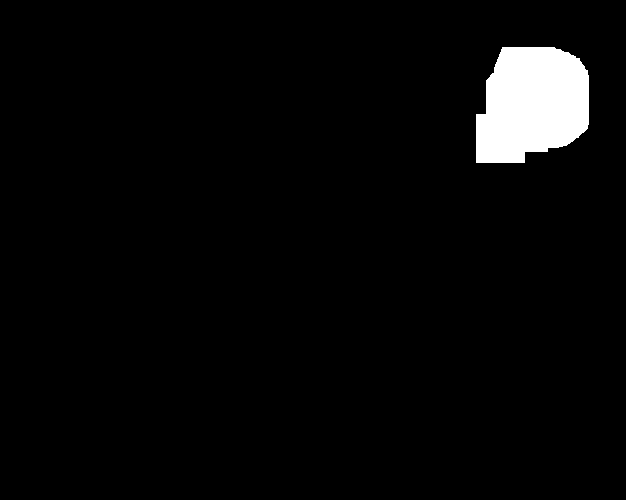

Peteca


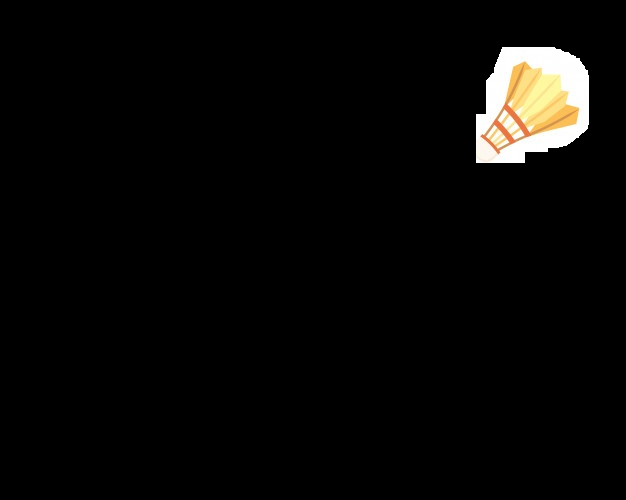

In [ ]:
NFL_HSV = cv2.cvtColor(res_fut, cv2.COLOR_BGR2HSV)

BOCHA_HSV = cv2.cvtColor(res_ball, cv2.COLOR_BGR2HSV)

TENIS_HSV = cv2.cvtColor(res_tenis, cv2.COLOR_BGR2HSV)

Imag_Bolas_HSV_2 = bolas2 - NFL_HSV - BOCHA_HSV - TENIS_HSV


lower_peteca_yellow = np.array([20,6,245])
upper_peteca_yellow = np.array([30,180,255])

lower_peteca_orage = np.array([0,180,20])
upper_peteca_orage = np.array([20,220,255])


mask_peteca_yellow = cv2.inRange(Imag_Bolas_HSV_2, lower_peteca_yellow, upper_peteca_yellow)

mask_peteca_orage = cv2.inRange(Imag_Bolas_HSV_2, lower_peteca_orage, upper_peteca_orage)

mask_peteca = cv2.bitwise_or(mask_peteca_orage, mask_peteca_yellow)

mask_peteca_eroded = cv2.erode(mask_peteca, kernel_2, iterations=2)

mask_peteca_dilated = cv2.dilate(mask_peteca_eroded, kernel_7, iterations=8)

mask_peteca_dilated = cv2.dilate(mask_peteca_eroded, kernel_8, iterations=8)


# Combinando a imagem original e a máscara

res_peteca = cv2.bitwise_and(imag2,imag2, mask = mask_peteca_dilated)
print("Original")
cv2_imshow(imag2)
print("Máscara")
cv2_imshow(mask_peteca_dilated)
print("Peteca")
cv2_imshow(res_peteca)

### Bola de Golfe

Original


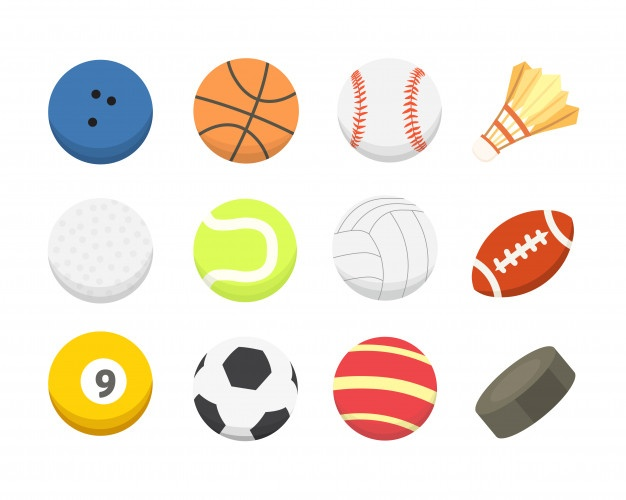

Máscara


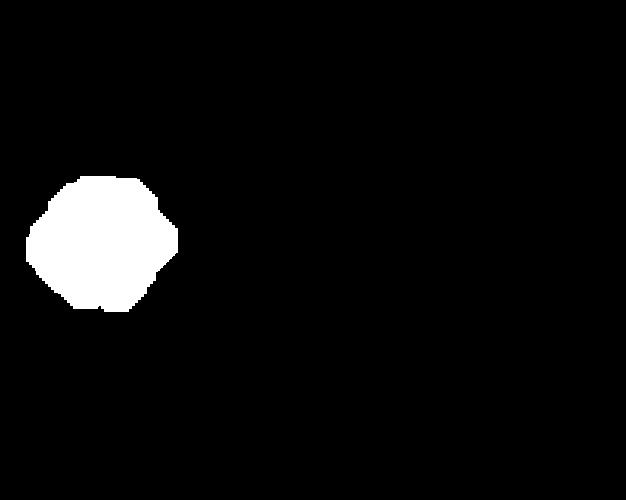

Bola Golve


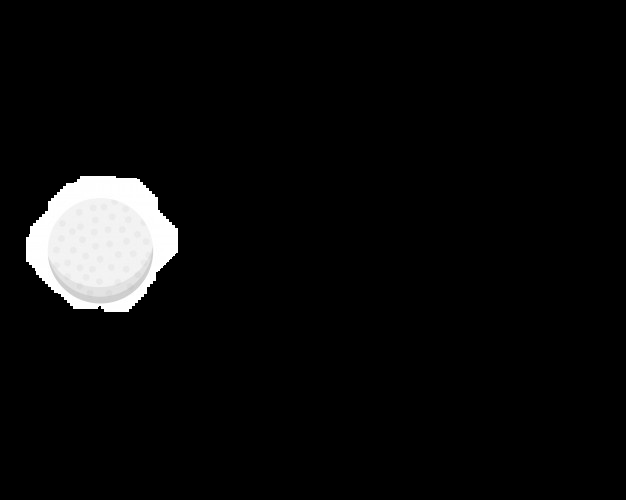

In [ ]:
NFL_HSV = cv2.cvtColor(res_fut, cv2.COLOR_BGR2HSV)

BOCHA_HSV = cv2.cvtColor(res_ball, cv2.COLOR_BGR2HSV)

TENIS_HSV = cv2.cvtColor(res_tenis, cv2.COLOR_BGR2HSV)


Imag_Bolas_HSV_2 = bolas2 - NFL_HSV - BOCHA_HSV - TENIS_HSV

#Definindo o range da cor preta no HSV(HSI)

lower_preto_golfe = np.array([0,0,234])
upper_preto_golfe = np.array([0,0,235])

#Criando a máscara

mask_golfe = cv2.inRange(bolas2, lower_preto_golfe, upper_preto_golfe)

mask_golfe_eroded = cv2.erode(mask_golfe , kernel_2, iterations=1)

mask_golfe_dilated = cv2.dilate(mask_golfe_eroded , kernel_7, iterations=6)

mask_golfe_dilated = cv2.dilate(mask_golfe_dilated , kernel_8, iterations=4)

# Combinando a imagem original e a máscara

res_golfe  = cv2.bitwise_and(imag2,imag2, mask = mask_golfe_dilated)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_golfe_dilated)
print("Bola Golfe")
cv2_imshow(res_golfe)

### Disco de Hoquei

Original


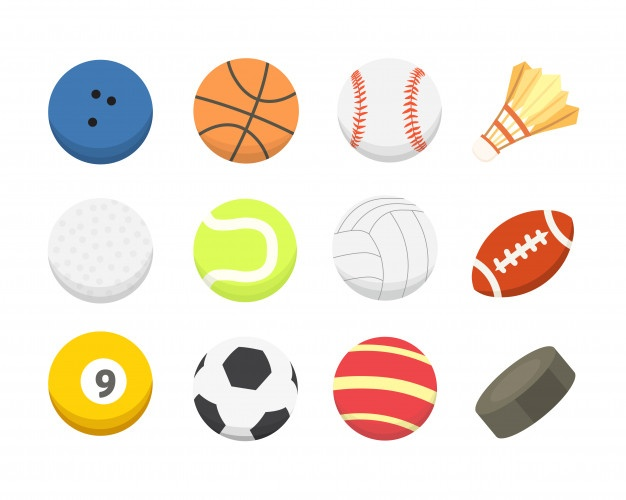

Máscara


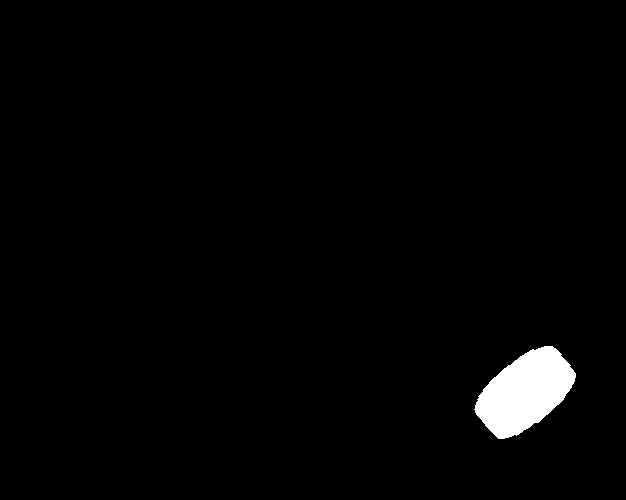

Disco de Hóquei


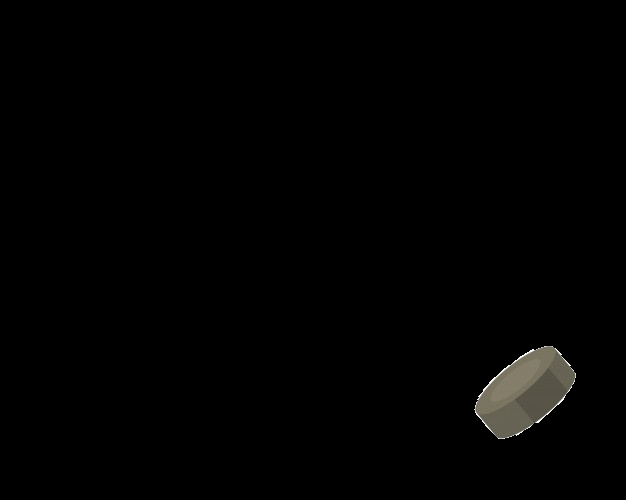

In [ ]:
lower_color_hoq = np.array([14,33,80])
upper_color_hoq = np.array([33,150,100])

lower_color_hoq_2 = np.array([16,35,100])
upper_color_hoq_2 = np.array([31,200,180])

mask_hoquei_grey_1 = cv2.inRange(bolas2, lower_color_hoq, upper_color_hoq)

mask_hoquei_grey_2 = cv2.inRange(bolas2, lower_color_hoq_2, upper_color_hoq_2)

mask_hoquei_grey = cv2.bitwise_or(mask_hoquei_grey_1, mask_hoquei_grey_2)

mask_hoquei_grey_eroded = cv2.erode(mask_hoquei_grey, kernel_2, iterations=2)

mask_hoquei_grey_dilated = cv2.dilate(mask_hoquei_grey_eroded, kernel_2, iterations=5)

res_hoquei = cv2.bitwise_and(imag2,imag2, mask = mask_hoquei_grey_dilated)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_hoquei_grey_dilated)
print("Disco de Hóquei")
cv2_imshow(res_hoquei)

### Bola de bocha

Original


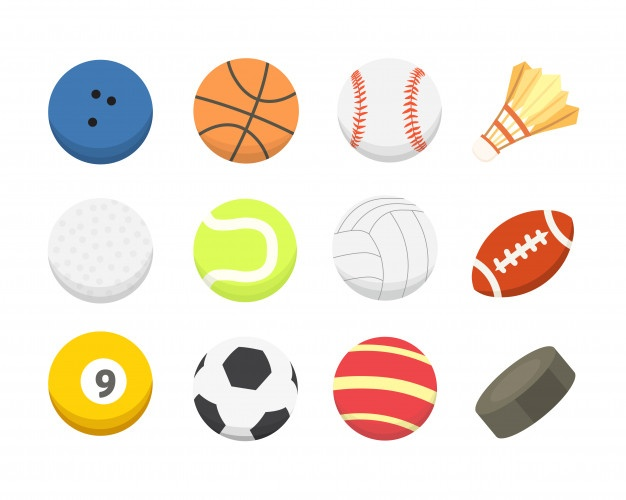

Máscara


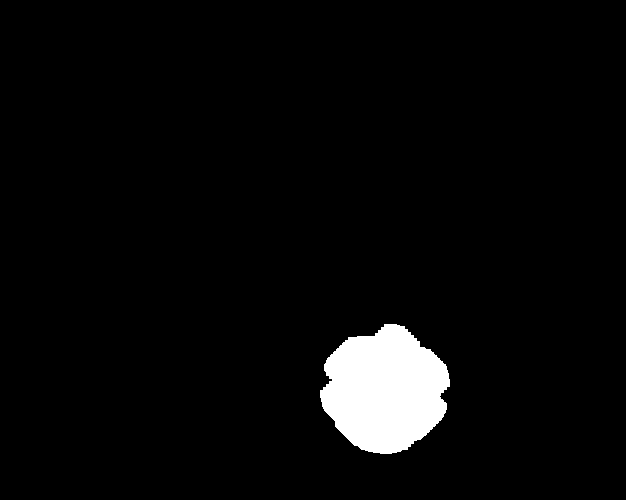

Bola de bocha


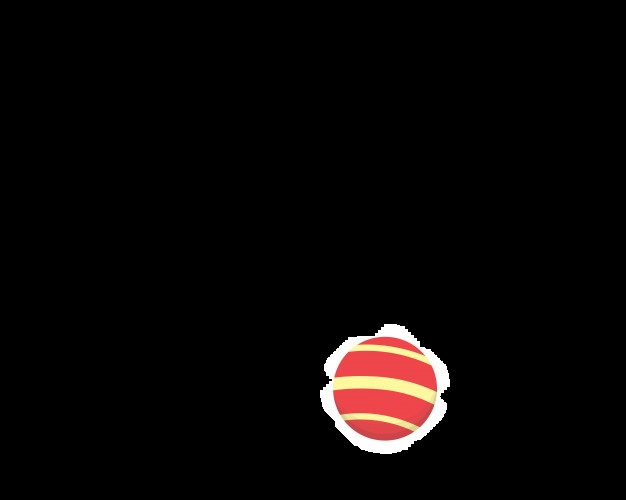

In [ ]:
lower_red_bocha = np.array([0,165,0])
upper_red_bocha  = np.array([5,185,255])

lower_red_bocha_2 = np.array([175,165,0])
upper_red_bocha_2  = np.array([179,185,255])

lower_yellow_bocha = np.array([25,75,245])
upper_yellow_bocha  = np.array([30,93,255])

mask_bocha_red  = cv2.inRange(bolas2, lower_red_bocha , upper_red_bocha)

mask_bocha_red_2  = cv2.inRange(bolas2, lower_red_bocha_2 , upper_red_bocha_2)

mask_bocha_yellow  = cv2.inRange(bolas2, lower_yellow_bocha , upper_yellow_bocha)

mask_bocha = cv2.bitwise_or(mask_bocha_red, mask_bocha_red_2)

mask_bocha = cv2.bitwise_or(mask_bocha, mask_bocha_yellow)

mask_bocha = cv2.erode(mask_bocha , kernel_2, iterations=3)

mask_bocha = cv2.dilate(mask_bocha , kernel_7, iterations=5)

mask_bocha = cv2.dilate(mask_bocha , kernel_8, iterations=1)

res_ball  = cv2.bitwise_and(imag2,imag2, mask = mask_bocha )

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(mask_bocha)
print("Bola de bocha")
cv2_imshow(res_ball)

### Bola de Baseball

Original


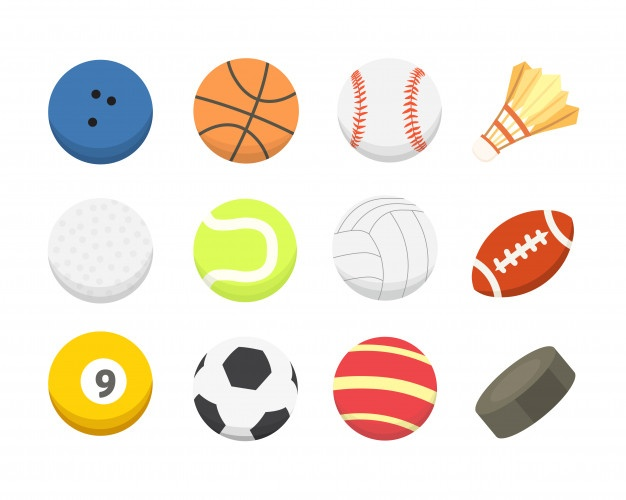

Máscara


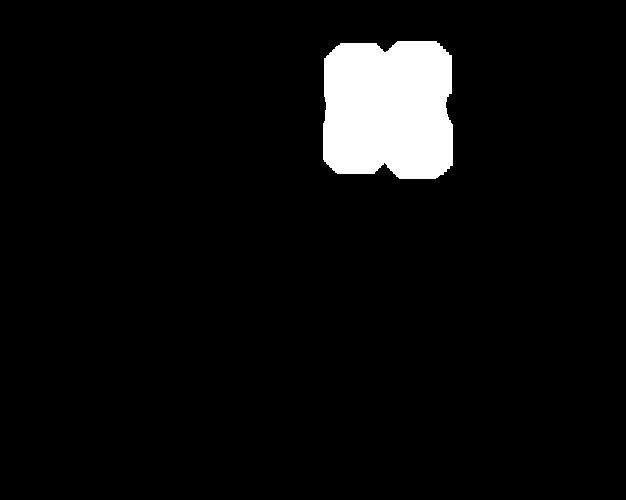

Bolas de baseball


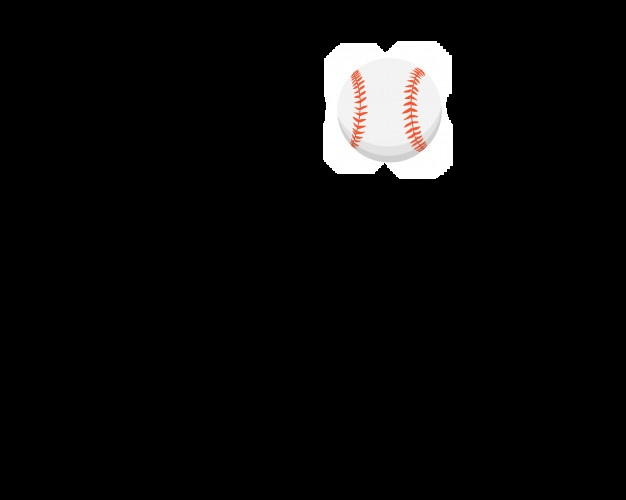

In [ ]:
BOLICHE_HSV = cv2.cvtColor(res_boliche, cv2.COLOR_BGR2HSV)

BASQUETE_HSV = cv2.cvtColor(res_basq, cv2.COLOR_BGR2HSV)

NFL_HSV = cv2.cvtColor(res_fut, cv2.COLOR_BGR2HSV)

TENIS_HSV = cv2.cvtColor(res_tenis, cv2.COLOR_BGR2HSV)

BOCHA_HSV = cv2.cvtColor(res_ball, cv2.COLOR_BGR2HSV)

FUTEBOL_HSV = cv2.cvtColor(res_futebol, cv2.COLOR_BGR2HSV)

BILHAR_HSV = cv2.cvtColor(res_sinuca, cv2.COLOR_BGR2HSV)

HOQUEI_HSV = cv2.cvtColor(res_hoquei, cv2.COLOR_BGR2HSV)

PETECA_HSV = cv2.cvtColor(res_peteca, cv2.COLOR_BGR2HSV)

GOLFE_HSV = cv2.cvtColor(res_golfe, cv2.COLOR_BGR2HSV)

Imag_Bolas_HSV_3 = bolas2 - BOLICHE_HSV - BASQUETE_HSV - NFL_HSV - TENIS_HSV - BOCHA_HSV - FUTEBOL_HSV - BILHAR_HSV - HOQUEI_HSV - PETECA_HSV - GOLFE_HSV

imag_openCV_3 = imag2 - res_boliche - res_basq - res_fut - res_tenis - res_ball - res_futebol - res_sinuca- res_hoquei - res_peteca - res_golfe

imag_openCV_3_grey = cv2.cvtColor(imag_openCV_3, cv2.COLOR_BGR2GRAY)

lower_beisebol_orage = np.array([0,50,180])
upper_beisebol_orage = np.array([15,180,255])

mask_beisebol = cv2.inRange(Imag_Bolas_HSV_3, lower_beisebol_orage, upper_beisebol_orage)

mask_beisebol_dilated_1 = cv2.dilate(mask_beisebol, kernel_8, iterations=6)
mask_beisebol_dilated_2 = cv2.dilate(mask_beisebol_dilated_1, kernel_7, iterations=3)


res_baseball = cv2.bitwise_and(imag_openCV_3,imag_openCV_3, mask = mask_beisebol_dilated_2)
print("Original")
cv2_imshow(imag2)
print("Máscara")
cv2_imshow(mask_beisebol_dilated_2)
print("Bolas de baseball")
cv2_imshow(res_baseball)


### Bola de Vôlei

Original


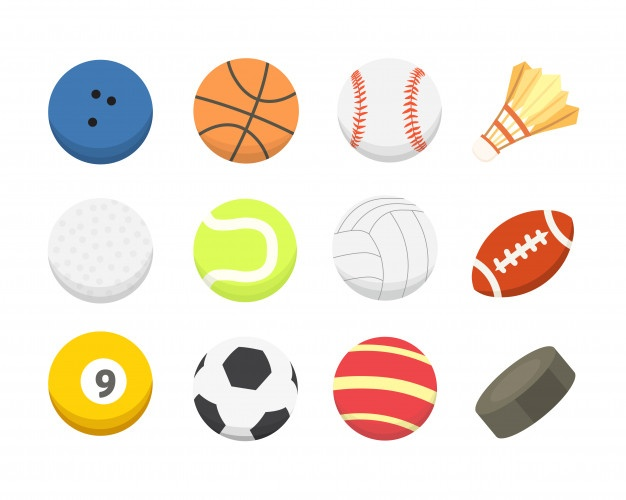

Máscara


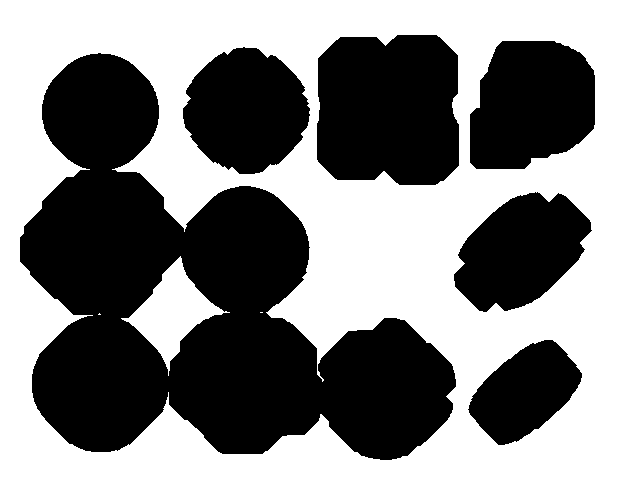

Bola de vôlei


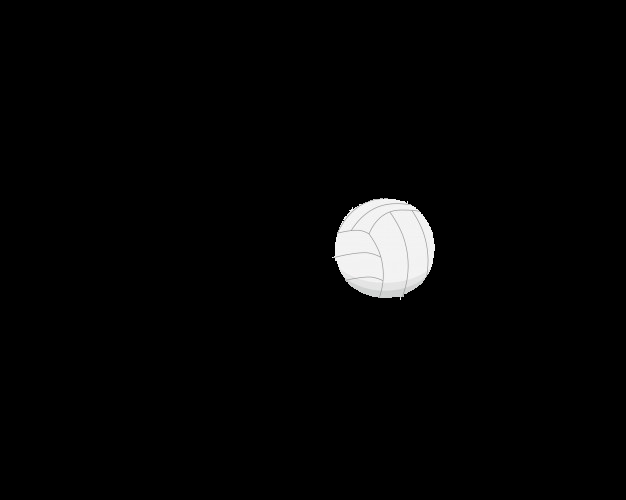

In [ ]:
last_mask_1 = cv2.bitwise_not(mask_beisebol_dilated_2 + mask_golfe_dilated + mask_golfe_dilated + mask_peteca_dilated + mask_hoquei_grey_dilated + mask_bilhar_dilated + mask_futebol_dilated + mask_bocha + mask_tenis_dilated + mask_NFL_2 + mask_basquete_2 + mask_blue)

ret, last_mask_2 = cv2.threshold(last_mask_1,250,255,cv2.THRESH_BINARY)

last_mask = cv2.erode(last_mask_2, kernel_2, iterations=6)

res_volei = cv2.bitwise_and(Imag_Final,Imag_Final, mask = last_mask)

print("Original")
cv2_imshow( imag2)
print("Máscara")
cv2_imshow(last_mask)
print("Bola de vôlei")
cv2_imshow(res_volei)


# Imagem 2

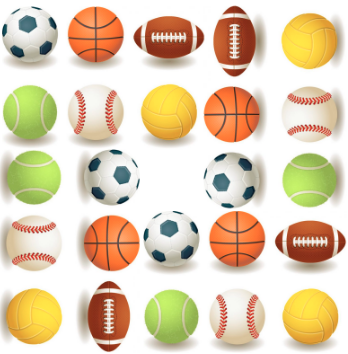

In [40]:
img1 = "/content/drive/MyDrive/PIM/ATVD07/bolas_original.png"
imag1 = cv2.imread(img1)

cv2_imshow(imag1)

imagGrey = cv2.cvtColor(imag1, cv2.COLOR_BGR2GRAY)

### Informações da imagem  1

In [ ]:
def Inf_spatial(img_grayscale):
    sh = cv2.Sobel (img_grayscale, cv2.CV_64F , 1, 0, ksize =1)
    sv = cv2.Sobel (img_grayscale , cv2.CV_64F , 0, 1, ksize =1)

    #SIr = np.sqrt (sh **2 + sv **2)
    SIr = np.sqrt(np.square(sh) + np.square(sv))

    SI_mean = np.sum(SIr ) / (SIr. shape [0] * SIr . shape [1])
    SI_rms = np.sqrt (np.sum (SIr **2) / (SIr. shape [0] * SIr . shape [1]) )
    SI_stdev = np.sqrt (np.sum(SIr **2 - SI_mean **2) / (SIr. shape [0] *SIr. shape [1]) )

    return SI_stdev

SI = Inf_spatial(imagGrey)


print ("Informação espacial 1 : %f" % SI )

Informação espacial 1 : 31.547674


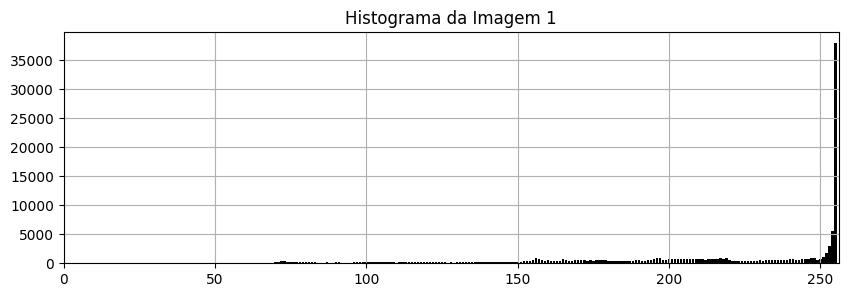

In [ ]:
def histograma(imagem):
    histogram, _ = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return histogram

hist_1 = histograma(imagGrey)
plt.figure(figsize=(10, 3))
plt.title("Histograma da Imagem 1")
plt.bar(np.arange(256), hist_1, color='black')
plt.xlim([0, 256])
plt.grid(True)

### Pré processamento

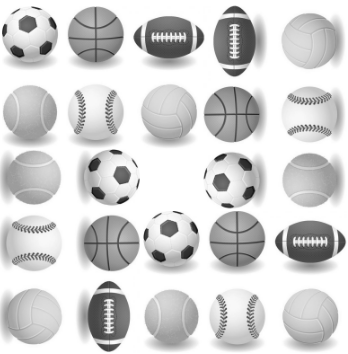

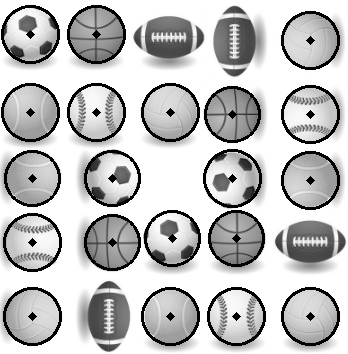

In [14]:
imagGrey = cv2.cvtColor(imag1, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagGrey)

img_blur = cv2.medianBlur(imagGrey, 5)

circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, imagGrey.shape[0]/64, param1=200, param2=10, minRadius=27, maxRadius=27)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:

        cv2.circle(imagGrey, (i[0], i[1]), i[2], (0, 255, 0), 2)

        cv2.circle(imagGrey, (i[0], i[1]), 2, (0, 0, 255), 3)


cv2_imshow(imagGrey)

Imagem 1 binarizada


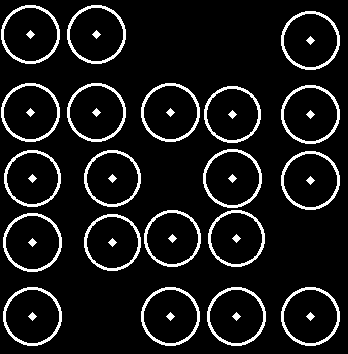



Imagem depois do algoritmo floodfill aplicado


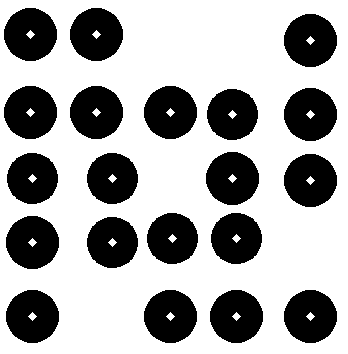

Imagem depois do algoritmo floodfill invertido aplicado


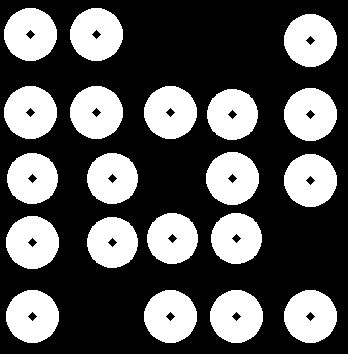



Imagem binarizada + imagem com o floodfill invertido 


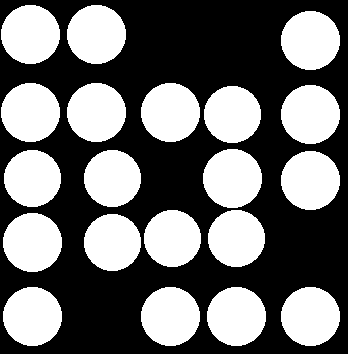

In [15]:
th, imag_binarized = cv2.threshold(imagGrey, 0, 255, cv2.THRESH_BINARY_INV);

img_floodfill = imag_binarized.copy()

h_1, w_1 = imag_binarized.shape[:2]

mask_1 = np.zeros((h_1+2, w_1+2), np.uint8)

cv2.floodFill(img_floodfill, mask_1, (0,0), 255);

img_floodfill_inv_1 = cv2.bitwise_not(img_floodfill)

img_out = imag_binarized|img_floodfill_inv_1

print('Imagem 1 binarizada')
cv2_imshow(imag_binarized)
print('\n')
print('Imagem depois do algoritmo floodfill aplicado')
cv2_imshow(img_floodfill)
print('Imagem depois do algoritmo floodfill invertido aplicado')
cv2_imshow(img_floodfill_inv_1)
print('\n')
print('Imagem binarizada + imagem com o floodfill invertido ')
cv2_imshow(img_out)

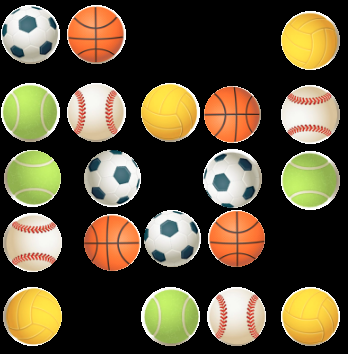


 Imagem em HSV 



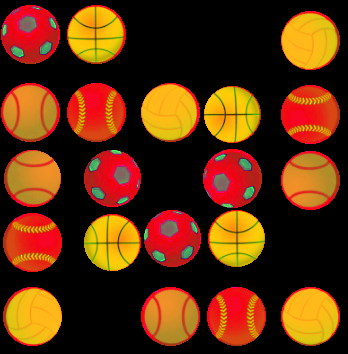

In [16]:
Imag_circles_ball_mask = img_out
Imag_circles_balls = cv2.bitwise_and(imag1, imag1, mask = Imag_circles_ball_mask )
cv2_imshow(Imag_circles_balls)

print('\n Imagem em HSV \n')

bolas = cv2.cvtColor(Imag_circles_balls, cv2.COLOR_BGR2HSV)
cv2_imshow(bolas)

### Bola de Tênis

Original


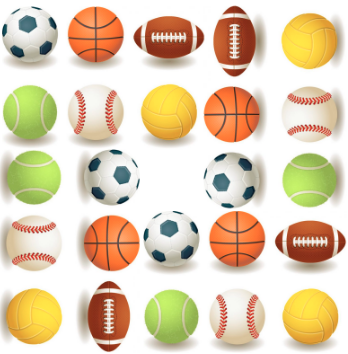

Máscara


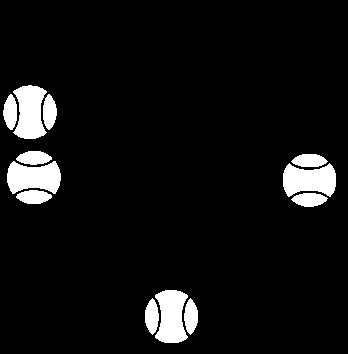

Máscara Dilatada


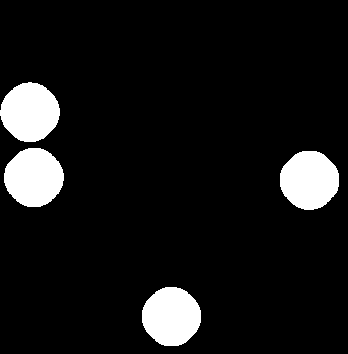

Bolas de tênis


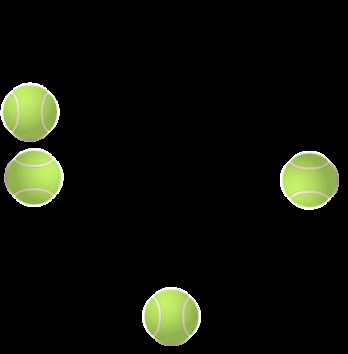

In [ ]:
img_hsv = cv2.cvtColor(imag1, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 85, 60])  # Valor mínimo de H, S e V
upper_green = np.array([70, 255, 255])  # Valor máximo de H, S e V

mask_green = cv2.inRange(img_hsv, lower_green, upper_green) # máscara p/ cor verde
mask_tenis_dilate = cv2.dilate(mask_green, kernel_7, iterations=1)

res_tenis = cv2.bitwise_and(imag1, imag1, mask=mask_tenis_dilate)

print("Original")
cv2_imshow( imag1)
print("Máscara")
cv2_imshow(mask_green)
print("Máscara Dilatada")
cv2_imshow(mask_tenis_dilate)
print("Bolas de tênis")
cv2_imshow(res_tenis)

### Bola de Basquete

Original


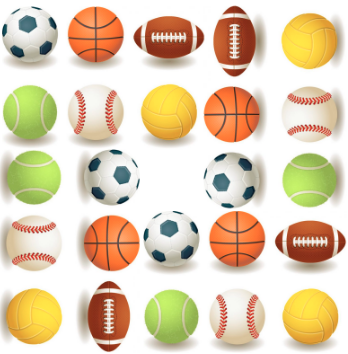

Máscara 1


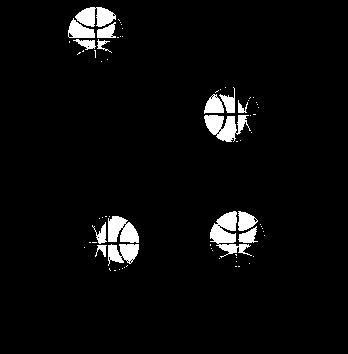

Máscara 2


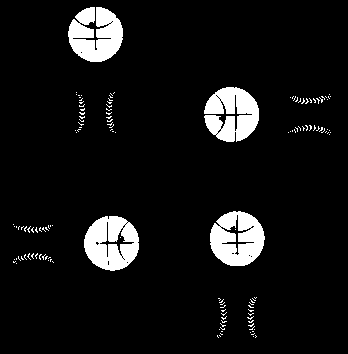

Junção Máscara 1 e 2


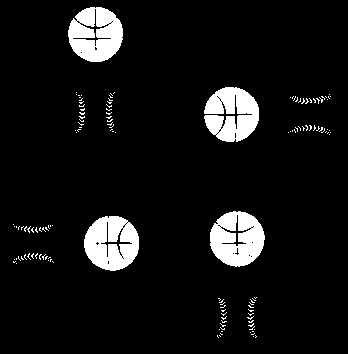

Máscara erosão


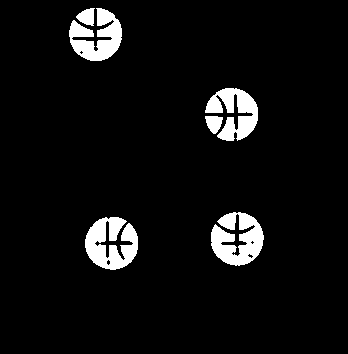

Máscara dilatação


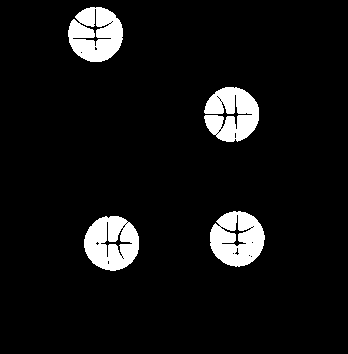

Máscara Final


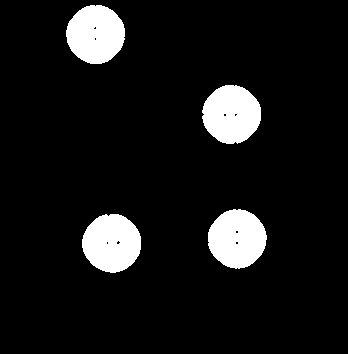

Bolas de basquete


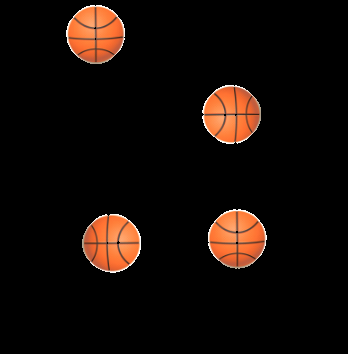

In [ ]:
target = imag1
print("Original")
cv2_imshow(target)
img_hsv = cv2.cvtColor(imag1, cv2.COLOR_BGR2HSV)

lower_laranja_basquete = np.array([10,138,10])
upper_laranja_basquete = np.array([15,240,255])

lower_laranja_dark_basquete2= np.array([0,150,5])
upper_laranja_dark_basquete2 = np.array([15,220,255])

#Máscara

mask_basquete_1 = cv2.inRange(bolas, lower_laranja_basquete, upper_laranja_basquete)
print("Máscara 1")
cv2_imshow(mask_basquete_1)

second_mask_basquete_2 = cv2.inRange(bolas, lower_laranja_dark_basquete2, upper_laranja_dark_basquete2)
print("Máscara 2")
cv2_imshow(second_mask_basquete_2)

mask_basquete_final = mask_basquete_1 | second_mask_basquete_2
print("Junção Máscara 1 e 2")
cv2_imshow(mask_basquete_final)

mask_basquete_eroded = cv2.erode(mask_basquete_final, kernel_2, iterations=1)
print("Máscara erosão")
cv2_imshow(mask_basquete_eroded)

mask_basquete_final_dilated = cv2.dilate(mask_basquete_eroded, kernel_2, iterations=1)
print("Máscara dilatação")
cv2_imshow(mask_basquete_final_dilated)

mask_basquete_final_dilated_2 = cv2.dilate(mask_basquete_final_dilated, kernel_2, iterations=2)
print("Máscara Final")
cv2_imshow(mask_basquete_final_dilated_2)

# Combinação da imagem original e a máscara

res_basquete = cv2.bitwise_and(imag1,imag1, mask = mask_basquete_final_dilated_2)
print("Bolas de basquete")
cv2_imshow(res_basquete)

### Bola de Vôlei

Original


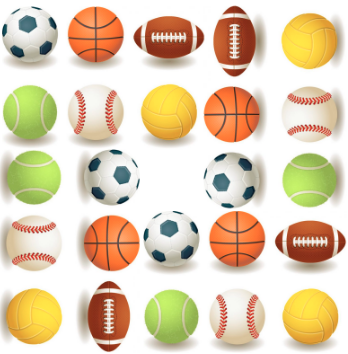

Máscara


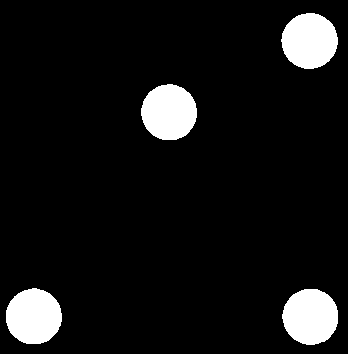

Bolas de vôlei


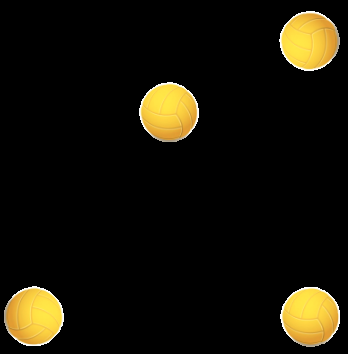

In [ ]:
img_hsv = cv2.cvtColor(imag1, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([18, 89, 60])  # Valor mínimo de H, S e V
upper_yellow = np.array([30, 255, 255])  # Valor máximo de H, S e V

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow) # máscara p/ cor amarela

mask_volei__dilated = cv2.dilate(mask_yellow, kernel_2, iterations = 2)

res_volei = cv2.bitwise_and(imag1, imag1, mask=mask_volei__dilated)

print("Original")
cv2_imshow( imag1)
print("Máscara")
cv2_imshow(mask_yellow)
print("Bolas de vôlei")
cv2_imshow(res_volei)

### Bola de Futebol

Imagem original 			 Bola de futebol isolada, máscara grosseira
Orignal


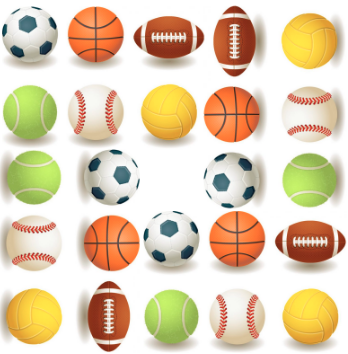

Máscara


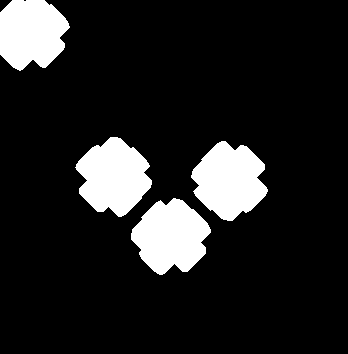

Combinação primeira máscara


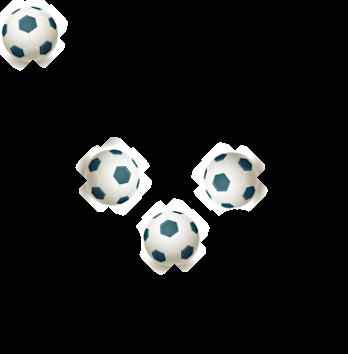


 Bolas de futebol final


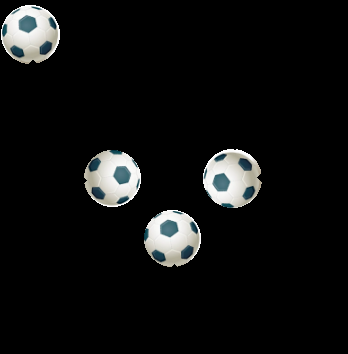

In [ ]:
img_modificada = imag1 - res_tenis - res_basquete - res_volei

lower_preto = np.array([88,0,2])
upper_preto = np.array([140,255,150])

mask_futebol  = cv2.inRange(bolas, lower_preto , upper_preto )

mask_futebol_dilated_imag_2  = cv2.dilate(mask_futebol , kernel_2, iterations=10)

mask_futebol_eroded_imag_2  = cv2.erode(mask_futebol_dilated_imag_2 , kernel_2, iterations=2)

second_mask_futebol_dilated_imag_2  = cv2.dilate(mask_futebol_eroded_imag_2 , kernel_2, iterations=4)

second_mask_futebol_eroded_imag_2  = cv2.erode(second_mask_futebol_dilated_imag_2 , kernel_2, iterations=1)

thirdy_mask_futebol_dilated_imag_2  = cv2.dilate(second_mask_futebol_eroded_imag_2 , kernel_2, iterations=2)

# Combinando a imagem original e a máscara

res_futebol_imag_2 = cv2.bitwise_and(img_modificada,img_modificada, mask = thirdy_mask_futebol_dilated_imag_2)

print('Imagem original \t\t\t Bola de futebol isolada, máscara grosseira')

print('Orignal')
cv2_imshow(imag1)
print('Máscara')
cv2_imshow(thirdy_mask_futebol_dilated_imag_2)
print('Combinação primeira máscara')
cv2_imshow(res_futebol_imag_2)



Imag_Grey_soccer = cv2.cvtColor(res_futebol_imag_2, cv2.COLOR_BGR2GRAY)


img_blur = cv2.medianBlur(Imag_Grey_soccer, 5)

circles_soccer = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, Imag_Grey_soccer.shape[0]/64, param1=200, param2=10, minRadius=27, maxRadius=27)

if circles_soccer is not None:
    circles_soccer = np.uint16(np.around(circles))
    for i in circles[0, :]:

        cv2.circle(Imag_Grey_soccer, (i[0], i[1]), i[2], (255, 255, 255), 2)

        cv2.circle(Imag_Grey_soccer, (i[0], i[1]), 2, (255, 255, 255), 3)


th, imag_binarized_soccer = cv2.threshold(Imag_Grey_soccer, 0, 255, cv2.THRESH_BINARY);
good_mask = cv2.bitwise_and(imag_binarized_soccer,thirdy_mask_futebol_dilated_imag_2)
good_mask_2 = cv2.bitwise_and(good_mask,img_out)
good_mask_eroded = cv2.erode(good_mask_2, kernel_2, iterations = 2)
good_mask_dilated = cv2.dilate(good_mask_eroded, kernel_2, iterations = 2)

print('\n Bolas de futebol final')
res_soccer_imag_2 = cv2.bitwise_and(imag1, imag1, mask = good_mask_dilated)
cv2_imshow(res_soccer_imag_2)


### Bola de Baseball

Original


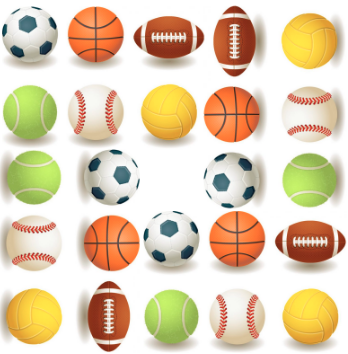

Máscara


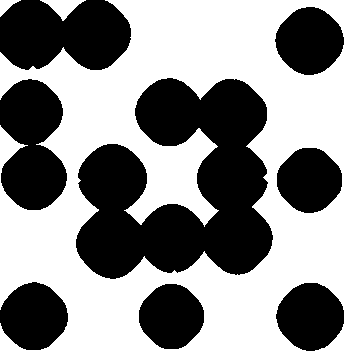

Bolas de baseball


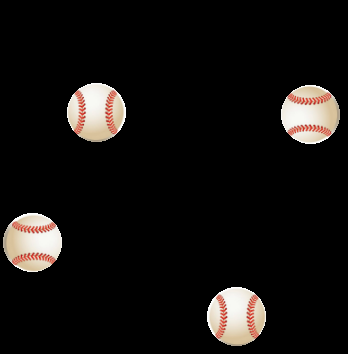

In [ ]:
last_mask_1_imag_2 = cv2.bitwise_not(mask_green + mask_basquete_final_dilated_2 + mask_yellow + good_mask_dilated)

ret, last_mask_2_imag_2 = cv2.threshold(last_mask_1_imag_2,250,255,cv2.THRESH_BINARY)

last_mask_imag_2 = cv2.erode(last_mask_2_imag_2, kernel_2, iterations=6)

res_beisebol = cv2.bitwise_and(Imag_circles_balls,Imag_circles_balls, mask = last_mask_imag_2)

print("Original")
cv2_imshow( imag1)
print("Máscara")
cv2_imshow(last_mask_imag_2)
print("Bolas de baseball")
cv2_imshow(res_beisebol)

### Bola de Futebol americano

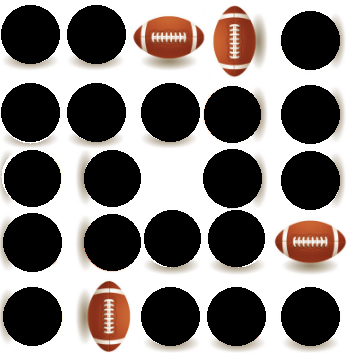

In [43]:
mask_fut_americcano = cv2.bitwise_not(img_out)

fa_mask = cv2.bitwise_and(imag1,imag1,mask = mask_fut_americcano)
cv2_imshow(fa_mask)

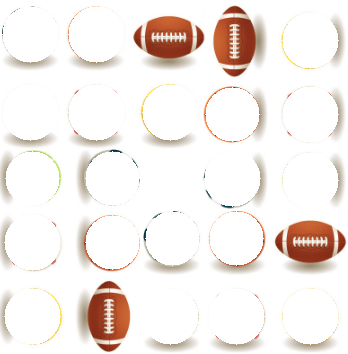

In [71]:
import cv2
import numpy as np


img1 = "/content/drive/MyDrive/PIM/ATVD07/bolas_original.png"
imag1 = cv2.imread(img1)
imagGrey = cv2.cvtColor(imag1, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(imagGrey, 5)

circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, imagGrey.shape[0]/64, param1=200, param2=10, minRadius=27, maxRadius=27)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:

        cv2.circle(imag1, (i[0], i[1]), i[2], (255, 255, 255), -1)  # Cor branca: (255, 255, 255)

    cv2_imshow(imag1)